In [1]:
#Important parameters
target_name='default12'
time_name='period'
event_rate_name='BR'
event_name='Bad'
prob_event='PD'
nonevent_name='Good'
share_name='Share'
variable_name='Variable'
grp_name='GRP'
all_name='All'
logit_name='Logit'
condition_name='Condition'
time_report_name='Time'
intercept_name='Intercept'
score_name='Score'
beta_name='Beta'
fbeta_name='FBeta'
id_row='aid'
gini_train='Gini train'
gini_test='Gini test'
delta_gini='R. Gini'
estimation='Estimation'
pvalue='P-value'
max_pvalue='Max p-value'
max_vif='Max VIF'
max_con_index='Max Con Index'
max_pearson='Max Pearson'
nnegative_betas='N negative betas'
wald_test='Wald test'
degree_free='Degrees of freedom'
std_err='Standard error'
bad_share='Bad share'
good_share='Good share'
INV='Infomration Value'
PSI='Population Stability Index'
PSI_tar='Population Stability Index for bads'
share_name_test='Share test'
bad_share_test='Bad share test'
type_name='Type'
percent_missing='Missing percent'
count_unique='Number of distinct'
event_value='outstanding_bad'
all_value='outstanding'
event_rate_name_value='BRBal'
nonevent_name_value='Balance good'
share_name_value='Balance share'
mode_name='Mode'
mode_pname='P. mode'
type_name='Type'


#Bining for numerical variables
ncategories_int=4
minimum_share_int=0.03
symbol_missing='Missing'

#Bining for character variables
symbol_other='<OTHERS>'
#minimum share of unique value
#minimum_share_unique=0.15
minimum_share_unique=0.03
#maximal number of bins
ncategories_nom=4

#option for response model
# category_order=True
#option for risk model
category_order=False

In [2]:
import pandas as pd
import math
import numpy as np

pd.set_option('display.max_columns', None)

# ef = pd.ExcelFile('abt_app_PD_INS.xlsx')
# ef = pd.ExcelFile('abt_app.xls')
# df = ef.parse('Sheet1')

In [3]:
df = pd.read_sas('./data/abt_app.sas7bdat', encoding='LATIN2')

In [4]:
df.head()

,cid,aid,product,period,act_age,act_cc,act_loaninc,app_income,app_loan_amount,app_n_installments,app_number_of_children,app_spendings,app_installment,app_char_branch,app_char_gender,app_char_job_code,app_char_marital_status,app_char_city,app_char_home_status,app_char_cars,act_call_cc,act_cins_n_loan,act_ccss_n_loan,act_call_n_loan,act_cins_seniority,act_cins_min_seniority,act_cins_n_loans_hist,act_cins_n_statC,act_cins_n_statB,act_cins_n_loans_act,act_cins_maxdue,act_cins_min_pninst,act_cins_min_lninst,act_cins_utl,act_cins_dueutl,act_cins_cc,act_ccss_seniority,act_ccss_min_seniority,act_ccss_n_loans_hist,act_ccss_n_statC,act_ccss_n_statB,act_ccss_n_loans_act,act_ccss_maxdue,act_ccss_min_pninst,act_ccss_min_lninst,act_ccss_utl,act_ccss_dueutl,act_ccss_cc,act_cus_active,agr3_Mean_CMaxI_Days,ags3_Mean_CMaxI_Days,agr3_Max_CMaxI_Days,ags3_Max_CMaxI_Days,agr3_Min_CMaxI_Days,ags3_Min_CMaxI_Days,agr3_Mean_CMaxI_Due,ags3_Mean_CMaxI_Due,agr3_Max_CMaxI_Due,ags3_Max_CMaxI_Due,agr3_Min_CMaxI_Due,ags3_Min_CMaxI_Due,agr3_Mean_CMaxC_Days,ags3_Mean_CMaxC_Days,agr3_Max_CMaxC_Days,ags3_Max_CMaxC_Days,agr3_Min_CMaxC_Days,ags3_Min_CMaxC_Days,agr3_Mean_CMaxC_Due,ags3_Mean_CMaxC_Due,agr3_Max_CMaxC_Due,ags3_Max_CMaxC_Due,agr3_Min_CMaxC_Due,ags3_Min_CMaxC_Due,agr3_Mean_CMaxA_Days,ags3_Mean_CMaxA_Days,agr3_Max_CMaxA_Days,ags3_Max_CMaxA_Days,agr3_Min_CMaxA_Days,ags3_Min_CMaxA_Days,agr3_Mean_CMaxA_Due,ags3_Mean_CMaxA_Due,agr3_Max_CMaxA_Due,ags3_Max_CMaxA_Due,agr3_Min_CMaxA_Due,ags3_Min_CMaxA_Due,act3_n_arrears,act3_n_arrears_days,act3_n_good_days,agr6_Mean_CMaxI_Days,ags6_Mean_CMaxI_Days,agr6_Max_CMaxI_Days,ags6_Max_CMaxI_Days,agr6_Min_CMaxI_Days,ags6_Min_CMaxI_Days,agr6_Mean_CMaxI_Due,ags6_Mean_CMaxI_Due,agr6_Max_CMaxI_Due,ags6_Max_CMaxI_Due,agr6_Min_CMaxI_Due,ags6_Min_CMaxI_Due,agr6_Mean_CMaxC_Days,ags6_Mean_CMaxC_Days,agr6_Max_CMaxC_Days,ags6_Max_CMaxC_Days,agr6_Min_CMaxC_Days,ags6_Min_CMaxC_Days,agr6_Mean_CMaxC_Due,ags6_Mean_CMaxC_Due,agr6_Max_CMaxC_Due,ags6_Max_CMaxC_Due,agr6_Min_CMaxC_Due,ags6_Min_CMaxC_Due,agr6_Mean_CMaxA_Days,ags6_Mean_CMaxA_Days,agr6_Max_CMaxA_Days,ags6_Max_CMaxA_Days,agr6_Min_CMaxA_Days,ags6_Min_CMaxA_Days,agr6_Mean_CMaxA_Due,ags6_Mean_CMaxA_Due,agr6_Max_CMaxA_Due,ags6_Max_CMaxA_Due,agr6_Min_CMaxA_Due,ags6_Min_CMaxA_Due,act6_n_arrears,act6_n_arrears_days,act6_n_good_days,agr9_Mean_CMaxI_Days,ags9_Mean_CMaxI_Days,agr9_Max_CMaxI_Days,ags9_Max_CMaxI_Days,agr9_Min_CMaxI_Days,ags9_Min_CMaxI_Days,agr9_Mean_CMaxI_Due,ags9_Mean_CMaxI_Due,agr9_Max_CMaxI_Due,ags9_Max_CMaxI_Due,agr9_Min_CMaxI_Due,ags9_Min_CMaxI_Due,agr9_Mean_CMaxC_Days,ags9_Mean_CMaxC_Days,agr9_Max_CMaxC_Days,ags9_Max_CMaxC_Days,agr9_Min_CMaxC_Days,ags9_Min_CMaxC_Days,agr9_Mean_CMaxC_Due,ags9_Mean_CMaxC_Due,agr9_Max_CMaxC_Due,ags9_Max_CMaxC_Due,agr9_Min_CMaxC_Due,ags9_Min_CMaxC_Due,agr9_Mean_CMaxA_Days,ags9_Mean_CMaxA_Days,agr9_Max_CMaxA_Days,ags9_Max_CMaxA_Days,agr9_Min_CMaxA_Days,ags9_Min_CMaxA_Days,agr9_Mean_CMaxA_Due,ags9_Mean_CMaxA_Due,agr9_Max_CMaxA_Due,ags9_Max_CMaxA_Due,agr9_Min_CMaxA_Due,ags9_Min_CMaxA_Due,act9_n_arrears,act9_n_arrears_days,act9_n_good_days,agr12_Mean_CMaxI_Days,ags12_Mean_CMaxI_Days,agr12_Max_CMaxI_Days,ags12_Max_CMaxI_Days,agr12_Min_CMaxI_Days,ags12_Min_CMaxI_Days,agr12_Mean_CMaxI_Due,ags12_Mean_CMaxI_Due,agr12_Max_CMaxI_Due,ags12_Max_CMaxI_Due,agr12_Min_CMaxI_Due,ags12_Min_CMaxI_Due,agr12_Mean_CMaxC_Days,ags12_Mean_CMaxC_Days,agr12_Max_CMaxC_Days,ags12_Max_CMaxC_Days,agr12_Min_CMaxC_Days,ags12_Min_CMaxC_Days,agr12_Mean_CMaxC_Due,ags12_Mean_CMaxC_Due,agr12_Max_CMaxC_Due,ags12_Max_CMaxC_Due,agr12_Min_CMaxC_Due,ags12_Min_CMaxC_Due,agr12_Mean_CMaxA_Days,ags12_Mean_CMaxA_Days,agr12_Max_CMaxA_Days,ags12_Max_CMaxA_Days,agr12_Min_CMaxA_Days,ags12_Min_CMaxA_Days,agr12_Mean_CMaxA_Due,ags12_Mean_CMaxA_Due,agr12_Max_CMaxA_Due,ags12_Max_CMaxA_Due,agr12_Min_CMaxA_Due,ags12_Min_CMaxA_Due,act12_n_arrears,act12_n_arrears_days,act12_n_good_days,decision,cross_aid,cross_response,cross_after_monhs,default3,default6,default9,default12,default_cross3,default_cross

In [5]:
print(type(df['app_char_job_code'][0]))
print(df['app_char_job_code'][0])

<class 'str'>
Permanent


In [6]:
df=df[('197501'<=df['period']) & (df['period']<='198712') & (df['product']=='css') & (df['decision']=='A')]

In [7]:
df[intercept_name]=1
df[event_value]=df['app_loan_amount']*df[target_name]
df[all_value]=df['app_loan_amount']
df.head()

,cid,aid,product,period,act_age,act_cc,act_loaninc,app_income,app_loan_amount,app_n_installments,app_number_of_children,app_spendings,app_installment,app_char_branch,app_char_gender,app_char_job_code,app_char_marital_status,app_char_city,app_char_home_status,app_char_cars,act_call_cc,act_cins_n_loan,act_ccss_n_loan,act_call_n_loan,act_cins_seniority,act_cins_min_seniority,act_cins_n_loans_hist,act_cins_n_statC,act_cins_n_statB,act_cins_n_loans_act,act_cins_maxdue,act_cins_min_pninst,act_cins_min_lninst,act_cins_utl,act_cins_dueutl,act_cins_cc,act_ccss_seniority,act_ccss_min_seniority,act_ccss_n_loans_hist,act_ccss_n_statC,act_ccss_n_statB,act_ccss_n_loans_act,act_ccss_maxdue,act_ccss_min_pninst,act_ccss_min_lninst,act_ccss_utl,act_ccss_dueutl,act_ccss_cc,act_cus_active,agr3_Mean_CMaxI_Days,ags3_Mean_CMaxI_Days,agr3_Max_CMaxI_Days,ags3_Max_CMaxI_Days,agr3_Min_CMaxI_Days,ags3_Min_CMaxI_Days,agr3_Mean_CMaxI_Due,ags3_Mean_CMaxI_Due,agr3_Max_CMaxI_Due,ags3_Max_CMaxI_Due,agr3_Min_CMaxI_Due,ags3_Min_CMaxI_Due,agr3_Mean_CMaxC_Days,ags3_Mean_CMaxC_Days,agr3_Max_CMaxC_Days,ags3_Max_CMaxC_Days,agr3_Min_CMaxC_Days,ags3_Min_CMaxC_Days,agr3_Mean_CMaxC_Due,ags3_Mean_CMaxC_Due,agr3_Max_CMaxC_Due,ags3_Max_CMaxC_Due,agr3_Min_CMaxC_Due,ags3_Min_CMaxC_Due,agr3_Mean_CMaxA_Days,ags3_Mean_CMaxA_Days,agr3_Max_CMaxA_Days,ags3_Max_CMaxA_Days,agr3_Min_CMaxA_Days,ags3_Min_CMaxA_Days,agr3_Mean_CMaxA_Due,ags3_Mean_CMaxA_Due,agr3_Max_CMaxA_Due,ags3_Max_CMaxA_Due,agr3_Min_CMaxA_Due,ags3_Min_CMaxA_Due,act3_n_arrears,act3_n_arrears_days,act3_n_good_days,agr6_Mean_CMaxI_Days,ags6_Mean_CMaxI_Days,agr6_Max_CMaxI_Days,ags6_Max_CMaxI_Days,agr6_Min_CMaxI_Days,ags6_Min_CMaxI_Days,agr6_Mean_CMaxI_Due,ags6_Mean_CMaxI_Due,agr6_Max_CMaxI_Due,ags6_Max_CMaxI_Due,agr6_Min_CMaxI_Due,ags6_Min_CMaxI_Due,agr6_Mean_CMaxC_Days,ags6_Mean_CMaxC_Days,agr6_Max_CMaxC_Days,ags6_Max_CMaxC_Days,agr6_Min_CMaxC_Days,ags6_Min_CMaxC_Days,agr6_Mean_CMaxC_Due,ags6_Mean_CMaxC_Due,agr6_Max_CMaxC_Due,ags6_Max_CMaxC_Due,agr6_Min_CMaxC_Due,ags6_Min_CMaxC_Due,agr6_Mean_CMaxA_Days,ags6_Mean_CMaxA_Days,agr6_Max_CMaxA_Days,ags6_Max_CMaxA_Days,agr6_Min_CMaxA_Days,ags6_Min_CMaxA_Days,agr6_Mean_CMaxA_Due,ags6_Mean_CMaxA_Due,agr6_Max_CMaxA_Due,ags6_Max_CMaxA_Due,agr6_Min_CMaxA_Due,ags6_Min_CMaxA_Due,act6_n_arrears,act6_n_arrears_days,act6_n_good_days,agr9_Mean_CMaxI_Days,ags9_Mean_CMaxI_Days,agr9_Max_CMaxI_Days,ags9_Max_CMaxI_Days,agr9_Min_CMaxI_Days,ags9_Min_CMaxI_Days,agr9_Mean_CMaxI_Due,ags9_Mean_CMaxI_Due,agr9_Max_CMaxI_Due,ags9_Max_CMaxI_Due,agr9_Min_CMaxI_Due,ags9_Min_CMaxI_Due,agr9_Mean_CMaxC_Days,ags9_Mean_CMaxC_Days,agr9_Max_CMaxC_Days,ags9_Max_CMaxC_Days,agr9_Min_CMaxC_Days,ags9_Min_CMaxC_Days,agr9_Mean_CMaxC_Due,ags9_Mean_CMaxC_Due,agr9_Max_CMaxC_Due,ags9_Max_CMaxC_Due,agr9_Min_CMaxC_Due,ags9_Min_CMaxC_Due,agr9_Mean_CMaxA_Days,ags9_Mean_CMaxA_Days,agr9_Max_CMaxA_Days,ags9_Max_CMaxA_Days,agr9_Min_CMaxA_Days,ags9_Min_CMaxA_Days,agr9_Mean_CMaxA_Due,ags9_Mean_CMaxA_Due,agr9_Max_CMaxA_Due,ags9_Max_CMaxA_Due,agr9_Min_CMaxA_Due,ags9_Min_CMaxA_Due,act9_n_arrears,act9_n_arrears_days,act9_n_good_days,agr12_Mean_CMaxI_Days,ags12_Mean_CMaxI_Days,agr12_Max_CMaxI_Days,ags12_Max_CMaxI_Days,agr12_Min_CMaxI_Days,ags12_Min_CMaxI_Days,agr12_Mean_CMaxI_Due,ags12_Mean_CMaxI_Due,agr12_Max_CMaxI_Due,ags12_Max_CMaxI_Due,agr12_Min_CMaxI_Due,ags12_Min_CMaxI_Due,agr12_Mean_CMaxC_Days,ags12_Mean_CMaxC_Days,agr12_Max_CMaxC_Days,ags12_Max_CMaxC_Days,agr12_Min_CMaxC_Days,ags12_Min_CMaxC_Days,agr12_Mean_CMaxC_Due,ags12_Mean_CMaxC_Due,agr12_Max_CMaxC_Due,ags12_Max_CMaxC_Due,agr12_Min_CMaxC_Due,ags12_Min_CMaxC_Due,agr12_Mean_CMaxA_Days,ags12_Mean_CMaxA_Days,agr12_Max_CMaxA_Days,ags12_Max_CMaxA_Days,agr12_Min_CMaxA_Days,ags12_Min_CMaxA_Days,agr12_Mean_CMaxA_Due,ags12_Mean_CMaxA_Due,agr12_Max_CMaxA_Due,ags12_Max_CMaxA_Due,agr12_Min_CMaxA_Due,ags12_Min_CMaxA_Due,act12_n_arrears,act12_n_arrears_days,act12_n_good_days,decision,cross_aid,cross_response,cross_after_monhs,default3,default6,default9,default12,default_cross3,default_cross

In [8]:
df.shape

(11437, 222)

In [9]:
#Do we have mising values in target variable?
one=df[target_name]
one[one.isnull()==True].head()

10   NaN
12   NaN
13   NaN
17   NaN
20   NaN
Name: default12, dtype: float64

In [10]:
#Dropping mising values in target variable
df_notempty=df.dropna(subset=[target_name])
one2=df_notempty[target_name]
one2[one2.isnull()==True].head()

Series([], Name: default12, dtype: float64)

In [11]:
#List of variables
vars=[var for var in list(df) if var[0:3].lower() in ['app','act']]
# vars=[var for var in list(df) if var[0:3].lower() in ['app','act','agr','ags']]
vars_target_id=vars+[target_name]+[time_name]+[intercept_name]+[event_value]+[all_value]+[id_row]
#vars_target_id

#splitting into numeric and character variables
varsc=list(df[vars].select_dtypes(include='object'))
varsn=list(df[vars].select_dtypes(include='number'))

#print(varsc, varsn)
#vars_target_id

In [12]:
#Splitting for train and test datasets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_notempty[vars_target_id], random_state = 1234, test_size=0.4)
print(train.shape, test.shape)
#train.head() 
#train[train[target_name].isnull()==True].head()
#test[test[target_name].isnull()==True].head()

(5916, 63) (3945, 63)


In [13]:
#Bining for numerical variables

import pandas as pd
import numpy as np
from sklearn import tree

# remove_list = []
labsn = {} # binns lists

for feature in varsn:
    #feature='app_income'
    miss_share=train[feature].isnull().sum()/train[feature].shape[0]
    miss_share=1-miss_share
    if miss_share<=0.00001:
        miss_share=1
    minimum_share=minimum_share_int/miss_share
    if minimum_share>0.5:
        minimum_share=0.5
    if minimum_share<minimum_share_int:
        minimum_share=minimum_share_int
    df_two_col=train[[target_name,feature]].dropna(subset=[feature]).copy()
    # binns list with [min,max]
    bins = [-np.inf, np.inf]
    # get Tree classifier - check if we need another parameters !!
    clf = tree.DecisionTreeClassifier(
        max_leaf_nodes=ncategories_int,
        min_weight_fraction_leaf=minimum_share,
        random_state=1234) 
    # fit tree
    clf.fit(df_two_col[feature].values.reshape(-1, 1), df_two_col[target_name])
    # get tresholds and remove empty
    thresh = [round(s, 3) for s in clf.tree_.threshold if s != -2]  
    # add tresholds to binns
    bins = bins + thresh 
    bins=sorted(bins)
    if train[feature].isnull().sum()/train[feature].shape[0] > minimum_share_int:
        bins=bins + [symbol_missing]
    labsn[feature]=bins
    

#labsn['app_number_of_children']=[-np.inf, 1, 1, 2, np.inf]
#labsn

In [14]:
#Bining for character variables

from sklearn.cluster import AgglomerativeClustering
# remove_list = []
labsc = {} # binns lists

for feature in varsc:
    df_two_col1=pd.DataFrame(train.groupby(feature)[target_name].count()/train.shape[0])
    df_two_col2=pd.DataFrame(train.groupby(feature)[target_name].mean())
    df_two_col=df_two_col2
    df_two_col['share']=df_two_col1[target_name]
    df_two_col = df_two_col.loc[df_two_col['share'] > minimum_share_unique]
    ncategoriesv=min(ncategories_nom,df_two_col.shape[0])
    if ncategoriesv>=2:
        cluster = AgglomerativeClustering(n_clusters=ncategoriesv, affinity='euclidean', linkage='ward')
        cluster.fit_predict(df_two_col[[target_name]])
        df_two_col['cluster']=cluster.labels_.reshape(-1,1)
    else:
        df_two_col['cluster']=0
    bins=df_two_col[['cluster']]
    if df_two_col['share'].sum() < (1-minimum_share_unique):
        bins.loc[symbol_other]=-1
        bins['cluster']=bins['cluster']+1
    bins=bins.sort_values(by='cluster')
    bins=bins.reset_index()
    labsc[feature]=bins
    
#labsc

c:\Users\user\Desktop\repos\CreditScoring\venv\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\user\Desktop\repos\CreditScoring\venv\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\user\Desktop\repos\CreditScoring\venv\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_16164\1129498950.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [15]:
#Creating GRP variables for numerical variables
feature_intervalsn = {}
for feature in varsn:
    intervals = []
    tekst=''
    for i in range(len(labsn[feature])):
        if i==0 and labsn[feature][i]==-np.inf and labsn[feature][i+1]!=np.inf:
            tekst=feature+' < '+str(labsn[feature][i+1])
            intervals=intervals + [tekst]        
        if i==0 and labsn[feature][i]==-np.inf and labsn[feature][i+1]==np.inf:
            tekst=feature+' <> '+symbol_missing
            intervals=intervals + [tekst]        
        if i>0 and labsn[feature][i-1]!=-np.inf and labsn[feature][i]==np.inf:
            tekst=str(labsn[feature][i-1])+' <= '+feature
            intervals=intervals + [tekst]        
        if i>0 and labsn[feature][i-1]!=-np.inf and labsn[feature][i]!=np.inf and labsn[feature][i]!=symbol_missing:
            tekst=str(labsn[feature][i-1])+' <= '+feature+' < '+str(labsn[feature][i])
            intervals=intervals + [tekst]        
        if labsn[feature][i]==symbol_missing:
            tekst=feature+' = '+symbol_missing
            intervals=intervals + [tekst]
    feature_intervalsn[feature]=intervals
        
#feature_intervalsn

In [16]:
#Creating GRP variables for character variables
feature_intervalsc = {}
for feature in varsc:
    intervals = []
    tekst=''
    for i in range(labsc[feature].shape[0]):
        if i==0:
            tekst=labsc[feature][feature][i]
        if i>0:
            if labsc[feature]['cluster'][i-1]==labsc[feature]['cluster'][i]:
                tekst=tekst+', '+labsc[feature][feature][i]
            else:
                intervals=intervals + [tekst]
                tekst=labsc[feature][feature][i]
        if i+1==labsc[feature].shape[0]:
            intervals=intervals + [tekst]
                    
    feature_intervalsc[feature]=intervals
        
#feature_intervalsc

In [17]:
#Creating GRP variables in train dataset
train_grp=train.copy()
nnn=0
for feature in varsn:
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=np.NaN
        for i in range(len(labsn[feature])):
            if i==0 and labsn[feature][i]==-np.inf and labsn[feature][i+1]!=np.inf and x<labsn[feature][i+1]:                
                    res=i            
            if i==0 and labsn[feature][i]==-np.inf and labsn[feature][i+1]==np.inf and (-np.inf<=x<=np.inf):            
                    res=i
            if i>0 and labsn[feature][i-1]!=-np.inf and labsn[feature][i]==np.inf and labsn[feature][i-1]<=x:            
                    res=i-1
            if i>0 and labsn[feature][i-1]!=-np.inf and labsn[feature][i]!=np.inf and labsn[feature][i]!=symbol_missing and labsn[feature][i-1]<=x<labsn[feature][i+1]:        
                    res=i-1
            if labsn[feature][i]==symbol_missing and math.isnan(x):
                    res=i-1
        return res
    train_grp[feature]=train_grp[feature].apply(grp)
    
for feature in varsc:
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=np.NaN
        if type(x) != str:
            x=str('')
        if labsc[feature][feature][0]==symbol_other:
            res=0
        for i in range(labsc[feature].shape[0]):
            if x==labsc[feature][feature][i] and labsc[feature][feature][i]!=symbol_other:
                res=labsc[feature]['cluster'][i]
        return res
    train_grp[feature]=train_grp[feature].apply(grp)
    
train_grp.head()

1 act_age
2 act_cc
3 act_loaninc
4 app_income
5 app_loan_amount
6 app_n_installments
7 app_number_of_children
8 app_spendings
9 app_installment
10 act_call_cc
11 act_cins_n_loan
12 act_ccss_n_loan
13 act_call_n_loan
14 act_cins_seniority
15 act_cins_min_seniority
16 act_cins_n_loans_hist
17 act_cins_n_statC
18 act_cins_n_statB
19 act_cins_n_loans_act
20 act_cins_maxdue
21 act_cins_min_pninst
22 act_cins_min_lninst
23 act_cins_utl
24 act_cins_dueutl
25 act_cins_cc
26 act_ccss_seniority
27 act_ccss_min_seniority
28 act_ccss_n_loans_hist
29 act_ccss_n_statC
30 act_ccss_n_statB
31 act_ccss_n_loans_act
32 act_ccss_maxdue
33 act_ccss_min_pninst
34 act_ccss_min_lninst
35 act_ccss_utl
36 act_ccss_dueutl
37 act_ccss_cc
38 act_cus_active
39 act3_n_arrears
40 act3_n_arrears_days
41 act3_n_good_days
42 act6_n_arrears
43 act6_n_arrears_days
44 act6_n_good_days
45 act9_n_arrears
46 act9_n_arrears_days
47 act9_n_good_days
48 act12_n_arrears
49 act12_n_arrears_days
50 act12_n_good_days
51 app_char_bra

,act_age,act_cc,act_loaninc,app_income,app_loan_amount,app_n_installments,app_number_of_children,app_spendings,app_installment,app_char_branch,app_char_gender,app_char_job_code,app_char_marital_status,app_char_city,app_char_home_status,app_char_cars,act_call_cc,act_cins_n_loan,act_ccss_n_loan,act_call_n_loan,act_cins_seniority,act_cins_min_seniority,act_cins_n_loans_hist,act_cins_n_statC,act_cins_n_statB,act_cins_n_loans_act,act_cins_maxdue,act_cins_min_pninst,act_cins_min_lninst,act_cins_utl,act_cins_dueutl,act_cins_cc,act_ccss_seniority,act_ccss_min_seniority,act_ccss_n_loans_hist,act_ccss_n_statC,act_ccss_n_statB,act_ccss_n_loans_act,act_ccss_maxdue,act_ccss_min_pninst,act_ccss_min_lninst,act_ccss_utl,act_ccss_dueutl,act_ccss_cc,act_cus_active,act3_n_arrears,act3_n_arrears_days,act3_n_good_days,act6_n_arrears,act6_n_arrears_days,act6_n_good_days,act9_n_arrears,act9_n_arrears_days,act9_n_good_days,act12_n_arrears,act12_n_arrears_days,act12_n_good_days,default12,period,Intercept,outstanding_bad,outstanding,aid
7964,1,0,0,3,0,0,2,2,0,0,1,1,2.0,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,1,4,4,4,4,4,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,198402,1,0.0,5000.0,css1984021000156
6912,1,2,1,2,0,0,0,2,0,0,1,0,0.0,2,1,0,0,1,0,0,0,2,0,0,0,0,0,3,0,3,0,1,1,2,0,0,1,4,4,4,4,4,4,4,0,0,0,3,0,0,3,0,0,3,0,0,3,0.0,198211,1,0.0,5000.0,css1982112200150
2980,2,2,3,0,0,0,0,2,0,0,1,0,0.0,0,1,0,0,1,0,0,2,0,1,0,1,0,0,1,1,1,0,2,2,3,1,0,3,4,4,4,4,4,4,4,0,0,0,3,0,0,1,0,0,1,0,0,0,0.0,197806,1,0.0,5000.0,css1978060100063
9953,1,0,1,2,0,0,2,1,0,0,0,1,1.0,0,1,0,0,1,0,0,3,1,2,3,0,0,0,1,3,1,0,0,1,3,1,0,2,4,4,4,4,4,4,4,0,0,0,3,0,0,1,0,0,1,0,0,0,0.0,198605,1,0.0,5000.0,css1986050800080
4174,2,0,1,2,0,0,2,2,0,0,1,0,2.0,3,1,0,3,2,3,3,2,0,2,3,0,1,0,1,0,1,0,1,2,0,3,3,0,3,0,2,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,197909,1,0.0,5000.0,css1979092200011


In [18]:
#Creating Big_scorecard
Big_scorecard=pd.DataFrame()
sum=train_grp.shape[0]
sum_bad=train_grp[target_name].sum()
sum_good=sum-sum_bad

for feature in varsn:
    fin=pd.DataFrame()
    sss=pd.DataFrame()
    ddd=pd.DataFrame()
    sss=pd.DataFrame(train_grp.groupby(feature).agg({target_name:['sum','count']}))
    sss=pd.DataFrame(sss[target_name])
    sss=sss.reset_index()
    sss=sss.rename(columns={"sum": event_name, "count": all_name, feature:grp_name})
    sss[nonevent_name]=sss[all_name]-sss[event_name]
    sss[event_rate_name]=sss[event_name]/sss[all_name]
    sss[logit_name]=np.log((sss[event_name]+0.0001) / (sss[nonevent_name]+0.0001))
    sss[share_name]=sss[all_name]/sum
    sss[variable_name]=feature    
    ddd=pd.DataFrame({grp_name:range(len(feature_intervalsn[feature])),condition_name:feature_intervalsn[feature]})
    fin=pd.merge(ddd, sss, on=grp_name)
    fin=fin[[variable_name,condition_name,event_rate_name,share_name,all_name,event_name,nonevent_name,logit_name,grp_name]]
    fin=fin.sort_values(by=[event_rate_name],ascending=category_order)
    fin=fin.reset_index(drop=True)
    fin[grp_name]=fin.index
    fin[type_name]='INT'
    # Big_scorecard=Big_scorecard.append(fin,ignore_index=True, sort=False)
    Big_scorecard = pd.concat([Big_scorecard, fin], ignore_index=True, sort=False)
    
for feature in varsc:
    fin=pd.DataFrame()
    sss=pd.DataFrame()
    ddd=pd.DataFrame()
    sss=pd.DataFrame(train_grp.groupby(feature).agg({target_name:['sum','count']}))
    sss=pd.DataFrame(sss[target_name])
    sss=sss.reset_index()
    sss=sss.rename(columns={"sum": event_name, "count": all_name, feature:grp_name})
    sss[nonevent_name]=sss[all_name]-sss[event_name]
    sss[event_rate_name]=sss[event_name]/sss[all_name]
    sss[logit_name]=np.log((sss[event_name]+0.0001) / (sss[nonevent_name]+0.0001))
    sss[share_name]=sss[all_name]/sum
    sss[variable_name]=feature    
    ddd=pd.DataFrame({grp_name:range(len(feature_intervalsc[feature])),condition_name:feature_intervalsc[feature]})
    fin=pd.merge(ddd, sss, on=grp_name)
    fin=fin[[variable_name,condition_name,event_rate_name,share_name,all_name,event_name,nonevent_name,logit_name,grp_name]]
    fin=fin.sort_values(by=[event_rate_name],ascending=category_order)
    fin=fin.reset_index(drop=True)
    fin[grp_name]=fin.index
    fin[type_name]='NOM'
    # Big_scorecard=Big_scorecard.append(fin,ignore_index=True, sort=False)
    Big_scorecard = pd.concat([Big_scorecard, fin], ignore_index=True, sort=False)

Big_scorecard[bad_share]=Big_scorecard[event_name]/sum_bad
Big_scorecard[good_share]=Big_scorecard[nonevent_name]/sum_good
Big_scorecard[INV]=(Big_scorecard[good_share]-Big_scorecard[bad_share])*np.log((Big_scorecard[good_share]+0.0001) / (Big_scorecard[bad_share]+0.0001))
Big_scorecard.to_excel('Big_scorecard.xlsx', index=False)    
Big_scorecard.head()

,Variable,Condition,BR,Share,All,Bad,Good,Logit,GRP,Type,Bad share,Good share,Infomration Value
0,act_age,act_age < 44.5,0.629344,0.043780,259,163.0,96.0,0.529402,0,INT,0.056499,0.031673,0.014334
1,act_age,44.5 <= act_age < 61.5,0.529936,0.398073,2355,1248.0,1107.0,0.119889,1,INT,0.432582,0.365226,0.011398
2,act_age,61.5 <= act_age < 80.5,0.461149,0.500338,2960,1365.0,1595.0,-0.155719,2,INT,0.473137,0.526229,0.005645
3,act_age,80.5 <= act_age,0.318713,0.057809,342,109.0,233.0,-0.759690,3,INT,0.037782,0.076872,0.027715
4,act_cc,0.884 <= act_cc,0.699005,0.067951,402,281.0,121.0,0.842564,0,INT,0.097400,0.039921,0.051183


In [19]:
#Creating grp_train and grp_test
#feature='app_income'
nnn=0
grp_train=train.copy()
grp_test=test.copy()
for feature in varsn:
    sub=pd.DataFrame()
    sub=Big_scorecard[Big_scorecard[variable_name]==feature]
    sub=sub.reset_index()
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=sub[grp_name][0]            
        for i in range(sub.shape[0]):
            sl=-np.inf
            sr=np.inf
            fl=sub[condition_name][i].find(' <= ')
            fr=sub[condition_name][i].find(' < ')
            if fl>=0:
                sl=float(sub[condition_name][i][0:fl])
            if fr>=0:
                sr=float(sub[condition_name][i][fr+3:])
            #fnm=condition_name][i].find(' <> '+symbol_missing)
            fm=sub[condition_name][i].find(' = '+symbol_missing)
            if fm>=0 and math.isnan(x):                
                    res=sub[grp_name][i]            
            if fm<0 and (sl <= x < sr):                
                    res=sub[grp_name][i] 
        return res
    grp_train[feature]=grp_train[feature].apply(grp)
    grp_test[feature]=grp_test[feature].apply(grp)

for feature in varsc:
    sub=pd.DataFrame()
    sub=Big_scorecard[Big_scorecard[variable_name]==feature]
    sub=sub.reset_index()
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=sub[grp_name][0] 
        if type(x) != str:
            x=str('')
        for i in range(sub.shape[0]):
            fo=sub[condition_name][i].find(symbol_other)
            if fo>=0:                
                    res=sub[grp_name][i]            
        for i in range(sub.shape[0]):
            fo=sub[condition_name][i].find(symbol_other)
            if fo<0 and sub[condition_name][i].find(x)>=0:                
                    res=sub[grp_name][i] 
        return res
    grp_train[feature]=grp_train[feature].apply(grp)
    grp_test[feature]=grp_test[feature].apply(grp)
    
    
grp_train.head()

1 act_age
2 act_cc
3 act_loaninc
4 app_income
5 app_loan_amount
6 app_n_installments
7 app_number_of_children
8 app_spendings
9 app_installment
10 act_call_cc
11 act_cins_n_loan
12 act_ccss_n_loan
13 act_call_n_loan
14 act_cins_seniority
15 act_cins_min_seniority
16 act_cins_n_loans_hist
17 act_cins_n_statC
18 act_cins_n_statB
19 act_cins_n_loans_act
20 act_cins_maxdue
21 act_cins_min_pninst
22 act_cins_min_lninst
23 act_cins_utl
24 act_cins_dueutl
25 act_cins_cc
26 act_ccss_seniority
27 act_ccss_min_seniority
28 act_ccss_n_loans_hist
29 act_ccss_n_statC
30 act_ccss_n_statB
31 act_ccss_n_loans_act
32 act_ccss_maxdue
33 act_ccss_min_pninst
34 act_ccss_min_lninst
35 act_ccss_utl
36 act_ccss_dueutl
37 act_ccss_cc
38 act_cus_active
39 act3_n_arrears
40 act3_n_arrears_days
41 act3_n_good_days
42 act6_n_arrears
43 act6_n_arrears_days
44 act6_n_good_days
45 act9_n_arrears
46 act9_n_arrears_days
47 act9_n_good_days
48 act12_n_arrears
49 act12_n_arrears_days
50 act12_n_good_days
51 app_char_bra

,act_age,act_cc,act_loaninc,app_income,app_loan_amount,app_n_installments,app_number_of_children,app_spendings,app_installment,app_char_branch,app_char_gender,app_char_job_code,app_char_marital_status,app_char_city,app_char_home_status,app_char_cars,act_call_cc,act_cins_n_loan,act_ccss_n_loan,act_call_n_loan,act_cins_seniority,act_cins_min_seniority,act_cins_n_loans_hist,act_cins_n_statC,act_cins_n_statB,act_cins_n_loans_act,act_cins_maxdue,act_cins_min_pninst,act_cins_min_lninst,act_cins_utl,act_cins_dueutl,act_cins_cc,act_ccss_seniority,act_ccss_min_seniority,act_ccss_n_loans_hist,act_ccss_n_statC,act_ccss_n_statB,act_ccss_n_loans_act,act_ccss_maxdue,act_ccss_min_pninst,act_ccss_min_lninst,act_ccss_utl,act_ccss_dueutl,act_ccss_cc,act_cus_active,act3_n_arrears,act3_n_arrears_days,act3_n_good_days,act6_n_arrears,act6_n_arrears_days,act6_n_good_days,act9_n_arrears,act9_n_arrears_days,act9_n_good_days,act12_n_arrears,act12_n_arrears_days,act12_n_good_days,default12,period,Intercept,outstanding_bad,outstanding,aid
7964,1,3,1,1,0,0,2,3,0,0,1,2,1,1,0,1,3,2,2,2,2,2,0,1,2,2,3,2,3,2,3,3,4,3,3,2,4,3,4,3,3,3,3,4,0,3,1,2,3,1,2,3,1,3,3,1,3,0.0,198402,1,0.0,5000.0,css1984021000156
6912,1,1,3,3,0,0,0,3,0,0,1,3,2,0,0,0,3,2,2,2,2,0,0,1,2,2,3,0,2,1,3,3,0,2,2,1,3,3,4,3,3,3,3,4,0,3,1,3,3,1,3,3,1,2,3,1,2,0.0,198211,1,0.0,5000.0,css1982112200150
2980,2,1,0,0,0,0,0,3,0,0,1,3,2,3,0,0,3,2,2,2,1,2,2,1,0,2,3,4,4,4,3,2,1,4,0,1,0,3,4,3,3,3,3,4,0,3,1,3,3,1,0,3,1,1,3,1,3,0.0,197806,1,0.0,5000.0,css1978060100063
9953,1,3,3,3,0,0,2,2,0,0,0,2,0,3,0,0,3,2,2,2,3,1,3,3,2,2,3,4,3,4,3,4,0,4,0,1,2,3,4,3,3,3,3,4,0,3,1,3,3,1,0,3,1,1,3,1,3,0.0,198605,1,0.0,5000.0,css1986050800080
4174,2,3,3,3,0,0,2,3,0,0,1,3,1,1,0,0,0,1,3,3,1,2,3,3,2,1,3,4,2,4,3,3,1,1,4,4,1,4,3,4,2,2,4,2,0,3,1,2,3,1,2,3,1,3,3,1,3,0.0,197909,1,0.0,5000.0,css1979092200011


In [20]:
#Creating Big_scorecard test
Big_scorecard_test=pd.DataFrame()
sum=grp_test.shape[0]
sum_bad=grp_test[target_name].sum()

for feature in vars:
    sss=pd.DataFrame()
    sss=pd.DataFrame(grp_test.groupby(feature).agg({target_name:['sum','count']}))
    sss=pd.DataFrame(sss[target_name])
    sss=sss.reset_index()
    sss=sss.rename(columns={"sum": event_name, "count": all_name, feature:grp_name})
    sss[nonevent_name]=sss[all_name]-sss[event_name]
    sss[share_name_test]=sss[all_name]/sum
    sss[bad_share_test]=sss[event_name]/sum_bad
    sss[variable_name]=feature
    sss=sss[[variable_name,grp_name,share_name_test,bad_share_test]]
    # Big_scorecard_test=Big_scorecard_test.append(sss,ignore_index=True, sort=False)
    Big_scorecard_test = pd.concat([Big_scorecard_test, sss], ignore_index=True,sort=False)

    

 
Big_scorecard_test.head()

,Variable,GRP,Share test,Bad share test
0,act_age,0,0.043093,0.056381
1,act_age,1,0.405070,0.440800
2,act_age,2,0.494804,0.461302
3,act_age,3,0.057034,0.041517
4,act_cc,0,0.059569,0.087647


In [21]:
#calculating PSI INV
Big_scorecard=pd.merge(Big_scorecard, Big_scorecard_test, on=[variable_name,grp_name], how='left')
Big_scorecard[PSI]=(Big_scorecard[share_name]-Big_scorecard[share_name_test])*np.log((Big_scorecard[share_name]+0.0001) / (Big_scorecard[share_name_test]+0.0001))
Big_scorecard[PSI_tar]=(Big_scorecard[bad_share]-Big_scorecard[bad_share_test])*np.log((Big_scorecard[bad_share]+0.0001) / (Big_scorecard[bad_share_test]+0.0001))

Big_scorecard.head()

,Variable,Condition,BR,Share,All,Bad,Good,Logit,GRP,Type,Bad share,Good share,Infomration Value,Share test,Bad share test,Population Stability Index,Population Stability Index for bads
0,act_age,act_age < 44.5,0.629344,0.043780,259,163.0,96.0,0.529402,0,INT,0.056499,0.031673,0.014334,0.043093,0.056381,0.000011,2.453937e-07
1,act_age,44.5 <= act_age < 61.5,0.529936,0.398073,2355,1248.0,1107.0,0.119889,1,INT,0.432582,0.365226,0.011398,0.405070,0.440800,0.000122,1.545945e-04
2,act_age,61.5 <= act_age < 80.5,0.461149,0.500338,2960,1365.0,1595.0,-0.155719,2,INT,0.473137,0.526229,0.005645,0.494804,0.461302,0.000062,2.997418e-04
3,act_age,80.5 <= act_age,0.318713,0.057809,342,109.0,233.0,-0.759690,3,INT,0.037782,0.076872,0.027715,0.057034,0.041517,0.000010,3.513148e-04
4,act_cc,0.884 <= act_cc,0.699005,0.067951,402,281.0,121.0,0.842564,0,INT,0.097400,0.039921,0.051183,0.059569,0.087647,0.001102,1.027908e-03


In [22]:
#Creating logit_train and logit_test
#feature='app_income'
nnn=0
logit_train=train.copy()
logit_test=test.copy()
for feature in varsn:
    sub=pd.DataFrame()
    sub=Big_scorecard[Big_scorecard[variable_name]==feature]
    sub=sub.reset_index()
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=sub[logit_name][0]            
        for i in range(sub.shape[0]):
            sl=-np.inf
            sr=np.inf
            fl=sub[condition_name][i].find(' <= ')
            fr=sub[condition_name][i].find(' < ')
            if fl>=0:
                sl=float(sub[condition_name][i][0:fl])
            if fr>=0:
                sr=float(sub[condition_name][i][fr+3:])
            #fnm=condition_name][i].find(' <> '+symbol_missing)
            fm=sub[condition_name][i].find(' = '+symbol_missing)
            if fm>=0 and math.isnan(x):                
                    res=sub[logit_name][i]            
            if fm<0 and (sl <= x < sr):                
                    res=sub[logit_name][i] 
        return res
    logit_train[feature]=logit_train[feature].apply(grp)
    logit_test[feature]=logit_test[feature].apply(grp)

for feature in varsc:
    sub=pd.DataFrame()
    sub=Big_scorecard[Big_scorecard[variable_name]==feature]
    sub=sub.reset_index()
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=sub[logit_name][0] 
        if type(x) != str:
            x=str('')
        for i in range(sub.shape[0]):
            fo=sub[condition_name][i].find(symbol_other)
            if fo>=0:                
                    res=sub[logit_name][i]            
        for i in range(sub.shape[0]):
            fo=sub[condition_name][i].find(symbol_other)
            if fo<0 and sub[condition_name][i].find(x)>=0:                
                    res=sub[logit_name][i] 
        return res
    logit_train[feature]=logit_train[feature].apply(grp)
    logit_test[feature]=logit_test[feature].apply(grp)
    
    
logit_train.head()

1 act_age
2 act_cc
3 act_loaninc
4 app_income
5 app_loan_amount
6 app_n_installments
7 app_number_of_children
8 app_spendings
9 app_installment
10 act_call_cc
11 act_cins_n_loan
12 act_ccss_n_loan
13 act_call_n_loan
14 act_cins_seniority
15 act_cins_min_seniority
16 act_cins_n_loans_hist
17 act_cins_n_statC
18 act_cins_n_statB
19 act_cins_n_loans_act
20 act_cins_maxdue
21 act_cins_min_pninst
22 act_cins_min_lninst
23 act_cins_utl
24 act_cins_dueutl
25 act_cins_cc
26 act_ccss_seniority
27 act_ccss_min_seniority
28 act_ccss_n_loans_hist
29 act_ccss_n_statC
30 act_ccss_n_statB
31 act_ccss_n_loans_act
32 act_ccss_maxdue
33 act_ccss_min_pninst
34 act_ccss_min_lninst
35 act_ccss_utl
36 act_ccss_dueutl
37 act_ccss_cc
38 act_cus_active
39 act3_n_arrears
40 act3_n_arrears_days
41 act3_n_good_days
42 act6_n_arrears
43 act6_n_arrears_days
44 act6_n_good_days
45 act9_n_arrears
46 act9_n_arrears_days
47 act9_n_good_days
48 act12_n_arrears
49 act12_n_arrears_days
50 act12_n_good_days
51 app_char_bra

,act_age,act_cc,act_loaninc,app_income,app_loan_amount,app_n_installments,app_number_of_children,app_spendings,app_installment,app_char_branch,app_char_gender,app_char_job_code,app_char_marital_status,app_char_city,app_char_home_status,app_char_cars,act_call_cc,act_cins_n_loan,act_ccss_n_loan,act_call_n_loan,act_cins_seniority,act_cins_min_seniority,act_cins_n_loans_hist,act_cins_n_statC,act_cins_n_statB,act_cins_n_loans_act,act_cins_maxdue,act_cins_min_pninst,act_cins_min_lninst,act_cins_utl,act_cins_dueutl,act_cins_cc,act_ccss_seniority,act_ccss_min_seniority,act_ccss_n_loans_hist,act_ccss_n_statC,act_ccss_n_statB,act_ccss_n_loans_act,act_ccss_maxdue,act_ccss_min_pninst,act_ccss_min_lninst,act_ccss_utl,act_ccss_dueutl,act_ccss_cc,act_cus_active,act3_n_arrears,act3_n_arrears_days,act3_n_good_days,act6_n_arrears,act6_n_arrears_days,act6_n_good_days,act9_n_arrears,act9_n_arrears_days,act9_n_good_days,act12_n_arrears,act12_n_arrears_days,act12_n_good_days,default12,period,Intercept,outstanding_bad,outstanding,aid
7964,0.119889,-0.324874,0.049154,0.049154,-0.049368,-0.049368,-0.511958,-0.231820,-0.049368,-0.049368,-0.106917,-0.032167,-0.074510,-0.033174,-0.018537,-0.222564,-0.212109,-0.228982,-0.655627,-0.482667,-0.076866,-0.719123,0.231007,-0.057158,-0.081373,-0.221592,-0.346841,-0.031749,-0.406986,0.006920,-0.34665,-0.250503,-0.594816,-0.594816,-0.594816,-0.594816,-0.594816,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.049368,-0.877819,-0.163152,-0.160259,-0.906915,-0.185384,-0.330699,-0.918363,-0.190155,-0.517907,-0.941226,-0.193101,-0.704374,0.0,198402,1,0.0,5000.0,css1984021000156
6912,0.119889,0.171789,-0.383530,-0.383530,-0.049368,-0.049368,0.175655,-0.231820,-0.049368,-0.049368,-0.106917,-0.161497,-0.301165,0.017060,-0.018537,-0.023347,-0.212109,-0.228982,-0.655627,-0.482667,-0.076866,0.361608,0.231007,-0.057158,-0.081373,-0.221592,-0.346841,0.177359,0.014982,0.126021,-0.34665,-0.250503,0.775726,-0.033133,-0.110348,0.268099,-0.250811,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.049368,-0.877819,-0.163152,-0.370098,-0.906915,-0.185384,-0.556125,-0.918363,-0.190155,-0.289089,-0.941226,-0.193101,-0.415669,0.0,198211,1,0.0,5000.0,css1982112200150
2980,-0.155719,0.171789,0.513599,0.513599,-0.049368,-0.049368,0.175655,-0.231820,-0.049368,-0.049368,-0.106917,-0.161497,-0.301165,-0.190778,-0.018537,-0.023347,-0.212109,-0.228982,-0.655627,-0.482667,0.008353,-0.719123,-0.086870,-0.057158,0.105949,-0.221592,-0.346841,-0.782857,-0.622985,-0.638893,-0.34665,0.118264,-0.061043,-1.006701,0.379526,0.268099,0.251693,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.049368,-0.877819,-0.163152,-0.370098,-0.906915,-0.185384,0.117591,-0.918363,-0.190155,-0.090040,-0.941226,-0.193101,-0.704374,0.0,197806,1,0.0,5000.0,css1978060100063
9953,0.119889,-0.324874,-0.383530,-0.383530,-0.049368,-0.049368,-0.511958,0.200671,-0.049368,-0.049368,0.129257,-0.032167,0.260531,-0.190778,-0.018537,-0.023347,-0.212109,-0.228982,-0.655627,-0.482667,-0.292435,-0.195478,-0.264302,-0.155805,-0.081373,-0.221592,-0.346841,-0.782857,-0.406986,-0.638893,-0.34665,-0.438157,0.775726,-1.006701,0.379526,0.268099,-0.085578,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.654584,-0.049368,-0.877819,-0.163152,-0.370098,-0.906915,-0.185384,0.117591,-0.918363,-0.190155,-0.090040,-0.941226,-0.193101,-0.704374,0.0,198605,1,0.0,5000.0,css1986050800080
4174,-0.155719,-0.324874,-0.383530,-0.383530,-0.049368,-0.049368,-0.511958,-0.231820,-0.049368,-0.049368,-0.106917,-0.161497,-0.074510,-0.033174,-0.018537,-0.023347,0.749027,-0.043485,-1.614303,-1.149578,0.008353,-0.719123,-0.264302,-0.155805,-0.081373,0.068993,-0.346841,-0.782857,0.014982,-0.638893,-0.34665,-0.250503,-0.061043,0.138365,-2.575876,-2.997650,0.057973,-2.619014,-0.633353,-0.671794,0.064538,-0.063013,-0.698582,0.122062,-0.049368,-0.877819,-0.163152,-0.160259,-0.906915,-0.185384,-0.330699,-0.918363,-0.190155,-0.517907,-0.941226,-0

In [23]:
#Calculating Gini values for features
#feature='app_const'
Gini_vars=pd.DataFrame()
from sklearn import metrics
for feature in vars:
    sss=pd.DataFrame([feature], columns=[variable_name])
    fpr, tpr, thresholds = metrics.roc_curve(logit_train[target_name], logit_train[feature])
    gini=np.absolute(2*metrics.auc(fpr, tpr)-1)
    sss[gini_train]=gini
    fpr, tpr, thresholds = metrics.roc_curve(logit_test[target_name], logit_test[feature])
    gini=np.absolute(2*metrics.auc(fpr, tpr)-1)
    sss[gini_test]=gini
    # Gini_vars=Gini_vars.append(sss,ignore_index=True, sort=False)
    Gini_vars = pd.concat([Gini_vars, sss], ignore_index=True,sort=False)
    
    
Gini_vars[delta_gini]=np.absolute(Gini_vars[gini_train]-Gini_vars[gini_test])/Gini_vars[gini_train]
Gini_vars[delta_gini]=Gini_vars[delta_gini].fillna(0)
Gini_vars=Gini_vars.sort_values(by=[gini_train],ascending=False)
Gini_vars=Gini_vars.reset_index(drop=True)

sss=pd.DataFrame(Big_scorecard.groupby(variable_name).agg({INV:['sum'],PSI:['sum'],PSI_tar:['sum']}))
sss.columns=[INV,PSI,PSI_tar]
sss=sss.reset_index()

pm = train[vars].isnull().sum() / len(train)
stat = pd.DataFrame({'percent_missing': pm}).reset_index()
stat.columns=[variable_name,percent_missing]
stat[count_unique]=0
for i in range(stat.shape[0]):
    stat[count_unique][i]=len(pd.unique(train[stat[variable_name][i]]))

Gini_vars=pd.merge(Gini_vars, sss, on=variable_name)
Gini_vars=pd.merge(Gini_vars, stat, on=variable_name)

fin=pd.DataFrame()
# feature='ags6_Iqr_Cncr'
# feature='app_char_job_code'
for feature in vars:
    row=pd.DataFrame(np.array([[1,2,3,4]]),columns=[variable_name,mode_name,mode_pname,type_name])
    row[variable_name]=feature

    ttt=train[[feature]].copy()
    ttt=ttt[ttt[feature].isnull()==False]
    pm2=ttt[feature].mode()
    row[mode_name]=pm2[0]

    ttt2=pd.DataFrame(ttt.groupby(feature)[feature].count()/ttt.shape[0])
    ttt2.columns=['count']
    ttt2=ttt2.reset_index()
    ttt2.columns=['var','count']
    ttt2=ttt2[ttt2['var']==pm2[0]]
    ttt2=ttt2.reset_index()
    row[mode_pname]=ttt2['count'][0]
    row[type_name]='INT'
    for f2 in varsc: 
        if f2==feature: row[type_name]='NOM'

    # fin=fin.append(row, ignore_index=True, sort=False)
    fin = pd.concat([fin, row], ignore_index=True,sort=False)
    

Gini_vars=pd.merge(Gini_vars, fin, on=variable_name)

Gini_vars.to_excel('Gini_vars.xlsx', index=False) 
Gini_vars.head()

C:\Users\user\AppData\Local\Temp\ipykernel_16164\2305521811.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat[count_unique][i]=len(pd.unique(train[stat[variable_name][i]]))
C:\Users\user\AppData\Local\Temp\ipykernel_16164\2305521811.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat[count_unique][i]=len(pd.unique(train[stat[variable_name][i]]))
C:\Users\user\AppData\Local\Temp\ipykernel_16164\2305521811.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,Variable,Gini train,Gini test,R. Gini,Infomration Value,Population Stability Index,Population Stability Index for bads,Missing percent,Number of distinct,Mode,P. mode,Type
0,act6_n_arrears,0.459617,0.469686,0.021907,0.816230,0.001080,0.002443,0.000000,7,0.0,0.367647,INT
1,act3_n_arrears,0.451067,0.481598,0.067686,0.810676,0.000777,0.001031,0.000000,4,0.0,0.448445,INT
2,act9_n_arrears,0.445152,0.456524,0.025545,0.741597,0.001385,0.001242,0.000000,10,0.0,0.323022,INT
3,act_ccss_n_loans_act,0.437456,0.440844,0.007744,0.801995,0.000348,0.001944,0.300541,7,1.0,0.306912,INT
4,act_ccss_n_loan,0.435972,0.431993,0.009128,0.695147,0.000179,0.001350,0.000000,7,1.0,0.302231,INT


In [24]:
sub=Gini_vars[
    (Gini_vars[gini_train]>0.05) 
    & (Gini_vars[delta_gini]<0.2)
    & (Gini_vars[PSI_tar]<0.1)
    & (Gini_vars[PSI]<0.1)
].copy()
vars_selected=list(sub[variable_name])
# vars_selected.remove('act_state_7_CMax_Due')
# vars_selected.remove('ags6_Iqr_Cncr')
# vars_selected.remove('ags9_Min_CMin_Days')



print(len(list(vars_selected)))
vars_selected

37


['act6_n_arrears',
 'act3_n_arrears',
 'act9_n_arrears',
 'act_ccss_n_loans_act',
 'act_ccss_n_loan',
 'act_ccss_dueutl',
 'act12_n_arrears',
 'act_ccss_maxdue',
 'act_ccss_utl',
 'act_call_n_loan',
 'act_ccss_min_lninst',
 'act_ccss_min_pninst',
 'act_ccss_n_statC',
 'act_ccss_n_loans_hist',
 'act12_n_good_days',
 'act_cins_min_seniority',
 'act_ccss_seniority',
 'act_ccss_min_seniority',
 'act_ccss_cc',
 'act9_n_good_days',
 'app_number_of_children',
 'act_cc',
 'act_cins_maxdue',
 'act_cins_min_pninst',
 'act_cins_dueutl',
 'act_cins_min_lninst',
 'act_ccss_n_statB',
 'act_call_cc',
 'act_cins_cc',
 'act12_n_arrears_days',
 'act9_n_arrears_days',
 'act6_n_arrears_days',
 'act_age',
 'act6_n_good_days',
 'app_char_marital_status',
 'act3_n_arrears_days',
 'act3_n_good_days']

In [25]:
#Creating full data
# grp_all=grp_train.append(grp_test, ignore_index=True, sort=False)
grp_all = pd.concat([grp_train, grp_test], ignore_index=True,sort=False)

print(grp_all.shape, train.shape, test.shape)

#grp_all.head()

(9861, 63) (5916, 63) (3945, 63)


In [26]:
#Creating time variable
grp_all[time_report_name]=grp_all[time_name].astype(str).str[0:4]
grp_all[[time_name,time_report_name]].head()

,period,Time
0,198402,1984
1,198211,1982
2,197806,1978
3,198605,1986
4,197909,1979


In [27]:
#Variable_report
startrow=2

# Dump Pandas DataFrame to Excel sheet
writer = pd.ExcelWriter('Variable_report.xlsx', engine='xlsxwriter')
Gini_vars.to_excel(writer, sheet_name=variable_name, startrow=1, index_label=None, index=False)

series = Gini_vars[variable_name]
max_len = max((series.astype(str).map(len).max(),len(str(series.name)))) + 1 

book = writer.book
sheet = writer.sheets[variable_name]
#format1 = workbook.add_format({'num_format': '#,##0.00'})
format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('B:B', None, format1)
sheet.set_column('C:C', None, format1)
sheet.set_column('D:D', None, format1)
sheet.set_column(0,0,max_len)
sheet.set_column(1,1,len(gini_train))
sheet.set_column(2,2,len(gini_test))
sheet.set_column(3,3,len(delta_gini))
sheet.set_column(4,4,len(INV))
sheet.set_column(5,5,len(PSI))
sheet.set_column(6,6,len(PSI_tar))
sheet.set_column(7,7,len(percent_missing))
sheet.set_column(8,8,len(count_unique))

sss2=pd.DataFrame(grp_all[time_report_name].value_counts())
ntimes=sss2.shape[0]
    
    
for feature in vars_selected:
    
    sssgr=pd.DataFrame(grp_all.groupby([time_report_name]).agg({target_name:['count']}))
    sssgr=pd.DataFrame(sssgr[target_name])
    sssgr=sssgr.reset_index()
    fin=pd.DataFrame()
    sss=pd.DataFrame()
    ddd=pd.DataFrame()
    sss=pd.DataFrame(grp_all.groupby([feature,time_report_name]).agg({target_name:['sum','count']}))
    sss=pd.DataFrame(sss[target_name])
    sss=sss.reset_index()
    sss=sss.rename(columns={"sum": event_name, "count": all_name, feature:grp_name})
    sss=pd.merge(sss, sssgr, on=time_report_name)
    sss[nonevent_name]=sss[all_name]-sss[event_name]
    sss[event_rate_name]=sss[event_name]/sss[all_name]
    sss[share_name]=sss[all_name]/sss["count"]
    sss=sss[[grp_name,time_report_name,event_name,all_name,nonevent_name,event_rate_name,share_name]]
    sss=sss.sort_values(by=[grp_name,time_report_name])
    
    sub=Big_scorecard[Big_scorecard[variable_name]==feature]
    sub=sub[[grp_name,condition_name,event_rate_name,share_name,all_name,event_name,nonevent_name]]
    ncat=sub.shape[0]
    
    shname=feature[0:31]
    sub.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False)
    sss.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False, startcol=8)
    book = writer.book
    sheet = writer.sheets[shname]
    bold = book.add_format({'bold': True, 'size': 24})
    sheet.write('A1', variable_name+': '+feature, bold)
    bold = book.add_format({'bold': True, 'size': 12})
    boldp = book.add_format({'bold': True, 'size': 12, 'num_format': '0.0%'})
    sheet.write_formula('D'+str(startrow+ncat+2), '=SUM(D4:D'+str(startrow+ncat+1)+')', boldp)
    sheet.write_formula('E'+str(startrow+ncat+2), '=SUM(E4:E'+str(startrow+ncat+1)+')', bold)
    sheet.write_formula('F'+str(startrow+ncat+2), '=SUM(F4:F'+str(startrow+ncat+1)+')', bold)
    sheet.write_formula('G'+str(startrow+ncat+2), '=SUM(G4:G'+str(startrow+ncat+1)+')', bold)

    #format1 = workbook.add_format({'num_format': '#,##0.00'})
    format1 = book.add_format({'num_format': '0.0%'})
    sheet.set_column('C:C', None, format1)
    sheet.set_column('D:D', None, format1)
    sheet.set_column('N:N', None, format1)
    sheet.set_column('O:O', None, format1)

    series = sub[condition_name]
    max_len = max((series.astype(str).map(len).max(),len(str(series.name)))) + 1
    sheet.set_column(1,1,max_len)

    # Chart
    chart = book.add_chart({'type': 'line'})
    chart.set_title({'name': event_rate_name})
    chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
    for i in range(ncat):
        chart.add_series({'values': '='+shname+'!N'+str(4+i*ntimes)+':N'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                         'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
    chart.set_legend({'position': 'bottom'})
    sheet.insert_chart('A'+str(ncat+6), chart)


    chart = book.add_chart({'type': 'line'})
    chart.set_title({'name': share_name})
    chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
    for i in range(ncat):
        chart.add_series({'values': '='+shname+'!O'+str(4+i*ntimes)+':O'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                         'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
    chart.set_legend({'position': 'bottom'})
    sheet.insert_chart('A'+str(ncat+6+18), chart)

# writer.save()
writer.close()

In [28]:
#Simple RFE selection method

from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit 
from sklearn.feature_selection import RFE
model = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(logit_train[vars_selected], logit_train[target_name])


RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=1)

In [29]:
#Assessment of combinations of features

number_vars=12
number_features=6

# number_vars=10
# number_features=5

# number_vars=15
# number_features=10

resultr = list(rfe.ranking_ <= number_vars)
selected_features = [vars_selected[i] for i, val in enumerate(resultr) if val == 1]

Model_list=pd.DataFrame()

def assess(selected_vars):
    Model_list0=pd.DataFrame(np.array([['b',2,'b',1.99,1.99,1.99,1.99,1.99,1.99]]),
        columns=['Variables','nnegative_betas','max_pvalue','gini_train','gini_test',
                 'delta_gini','max_vif','max_con_index','max_pearson',])

    var_list=''
    for i,v in enumerate(selected_vars):
        if i==0:
            var_list=v
        else:
            var_list=var_list+','+v

    Model_list0['Variables'][0]=var_list

    import statsmodels.api as sm
    from sklearn.metrics import auc, roc_curve 
    from statsmodels.discrete.discrete_model import Logit 

    features = selected_vars+[intercept_name]
    X=logit_train[features]
    y=logit_train[target_name]
    X_test=logit_test[features]
    y_test=logit_test[target_name]

    model = sm.Logit(y, X).fit(disp = 0,method='newton')

    pv=0
    nnegative_betas=0
    for i in range(len(list(model.params))):
        if model.params[i]<0 and model.params.index[i]!=intercept_name: 
            nnegative_betas+=1
        if model.params.index[i]!=intercept_name: 
            pv=max(pv,model.pvalues[i])
    max_pvalue=pv

    pre = model.predict(X)
    fpr, tpr, thresholds = roc_curve(y, pre)
    gini_train = np.absolute(2 * auc(fpr, tpr) - 1)

    pre = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pre)
    gini_test = np.absolute(2 * auc(fpr, tpr) - 1)

    delta_gini=np.absolute(gini_train-gini_test)/gini_train
    if math.isnan(delta_gini): delta_gini=0

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=1
    for i in range(X.shape[1]):
        if list(X)[i]!=intercept_name:
            vif = max(float(variance_inflation_factor(np.asarray(X), i)),vif)
    max_vif=vif

    X_new = X/(((X*X).sum())**0.5)
    Xt = np.transpose(X_new)
    XtX = np.dot(Xt,X_new)
    Eig = np.linalg.eig(XtX)[0]
    max_con_index = np.sqrt(np.max(Eig) / np.min(Eig))

    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    upper = upper.fillna(0)
    max_pearson=max(upper.max())

    Model_list0['nnegative_betas'][0]=int(nnegative_betas)
    Model_list0['max_pvalue'][0]=float(max_pvalue)
    Model_list0['gini_train'][0]=float(gini_train)
    Model_list0['gini_test'][0]=float(gini_test)
    Model_list0['delta_gini'][0]=float(delta_gini)
    Model_list0['max_vif'][0]=float(max_vif)
    Model_list0['max_con_index'][0]=float(max_con_index)
    Model_list0['max_pearson'][0]=float(max_pearson)

    return Model_list0

# Model_list=Model_list.append(assess(selected_features), ignore_index=True, sort=False)
Model_list = pd.concat([Model_list, assess(selected_features)], ignore_index=True, sort=False)


index=2**number_vars-1
for i in range(index):
    get_bin = lambda i, n: format(i, 'b').zfill(n)
    bin=get_bin(i,number_vars)
    suma=0
    selected_v=list([])
    for i,p in enumerate(bin):
        if p=='1': 
            suma=suma+1
            selected_v.append(selected_features[i])
    if suma==number_features:
#         print(selected_v)
        # Model_list=Model_list.append(assess(selected_v), ignore_index=True, sort=False)
        Model_list = pd.concat([Model_list, assess(selected_v)], ignore_index=True, sort=False)
        

Model_list.head()

C:\Users\user\AppData\Local\Temp\ipykernel_16164\493679502.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.params[i]<0 and model.params.index[i]!=intercept_name:
C:\Users\user\AppData\Local\Temp\ipykernel_16164\493679502.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pv=max(pv,model.pvalues[i])
C:\Users\user\AppData\Local\Temp\ipykernel_16164\493679502.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model

,Variables,nnegative_betas,max_pvalue,gini_train,gini_test,delta_gini,max_vif,max_con_index,max_pearson
0,"act9_n_arrears,act_ccss_maxdue,act_ccss_min_ln...",1,0.000837,0.688384,0.703276,0.021633,2.070901,2.921838,0.627076
1,"act_cins_maxdue,act_ccss_n_statB,act_call_cc,a...",0,0.0,0.410867,0.416606,0.013966,1.070481,1.586271,0.16466
2,"act_cc,act_ccss_n_statB,act_call_cc,act_age,ap...",0,0.0,0.402588,0.398936,0.00907,1.487624,2.028783,0.557275
3,"act_cc,act_cins_maxdue,act_call_cc,act_age,app...",0,0.0,0.406222,0.416889,0.026259,1.48221,1.980292,0.557275
4,"act_cc,act_cins_maxdue,act_ccss_n_statB,act_ag...",0,0.0,0.425052,0.436858,0.027776,1.091654,1.631022,0.190125


In [103]:
# np.bool == np.bool_

In [30]:
Model_list.shape

(925, 9)

In [31]:
subModel_list=Model_list[
    (Model_list['nnegative_betas']==0) 
    & (Model_list['max_pvalue']<=0.01) 
    & (Model_list['max_vif']<=3.0) 
    
].copy()
subModel_list=subModel_list.sort_values(by=['gini_test'],ascending=False)
subModel_list=subModel_list.reset_index()
subModel_list.head()

,index,Variables,nnegative_betas,max_pvalue,gini_train,gini_test,delta_gini,max_vif,max_con_index,max_pearson
0,837,"act9_n_arrears,act_ccss_maxdue,act_ccss_n_stat...",0,0.0,0.660177,0.673524,0.020217,1.69372,2.226557,0.627076
1,893,"act9_n_arrears,act_ccss_maxdue,act_ccss_min_ln...",0,0.0,0.656458,0.67198,0.023644,1.725393,2.274795,0.627076
2,404,"act_ccss_maxdue,act_ccss_min_lninst,app_number...",0,0.0,0.652104,0.670736,0.028571,1.142715,1.580896,0.33861
3,334,"act_ccss_maxdue,act_ccss_n_statC,app_number_of...",0,0.0,0.656073,0.670347,0.021756,1.180377,1.750337,0.257694
4,394,"act_ccss_maxdue,act_ccss_min_lninst,app_number...",0,0.0,0.643344,0.666733,0.036356,1.141022,1.605172,0.33861


In [32]:
subModel_list['Variables'][0].split(',')

['act9_n_arrears',
 'act_ccss_maxdue',
 'act_ccss_n_statC',
 'app_number_of_children',
 'act_cc',
 'act_age']

In [33]:
#Model assessment based on selected variables selected_features

selected_features=subModel_list['Variables'][0].split(',')

import statsmodels.api as sm
from sklearn.metrics import auc, roc_curve 
from statsmodels.discrete.discrete_model import Logit 

features = selected_features+[intercept_name]
X=logit_train[features]
y=logit_train[target_name]
X_test=logit_test[features]
y_test=logit_test[target_name]

result = {'Efects': pd.DataFrame(),
          gini_train: np.nan,
          gini_test: np.nan,
          delta_gini: np.nan,
          max_pvalue: '',
          nnegative_betas: 0,
          max_vif: np.nan,
          max_pearson: np.nan,
          max_con_index: np.nan,
          'KS score': np.nan,
          'PSI score': np.nan,
          'Gains1': np.nan,
          'Gains2': np.nan,
          'Gains3': np.nan,
          'Gains4': np.nan,
          'Gains5': np.nan,
          'Gains10': np.nan,
          'Gains50': np.nan,
          'Lift1': np.nan,
          'Lift2': np.nan,
          'Lift3': np.nan,
          'Lift4': np.nan,
          'Lift5': np.nan,
          'Lift10': np.nan,
          'Lift50': np.nan
          }

model = sm.Logit(y, X).fit(disp = 0,method='newton')

#result['Coef']=model.params
#result['P_value']=model.pvalues
ggg=model.wald_test_terms().summary_frame().reset_index()
ggg.columns=[variable_name,wald_test,pvalue,degree_free]
ppp=pd.DataFrame(model.params,columns=[estimation]).reset_index()
ppp.columns=[variable_name,estimation]
ppp=pd.merge(ppp, ggg, on=variable_name)
se=model.summary2().tables[1].reset_index()
se.columns=[variable_name,'c',std_err,'z','p','l','r']
se=se[[variable_name,std_err]]
ppp=pd.merge(ppp, se, on=variable_name)
ppp=ppp[[variable_name,degree_free,estimation,std_err,wald_test,pvalue]]

def pval(x):
    if x>0.0001: wyn='%.4f' % x
    else: wyn='<.0001'
    return wyn

ppp[pvalue]=ppp[pvalue].apply(pval)

result['Efects']=ppp

pv=0
for i in range(len(list(model.params))):
    if model.params[i]<0 and model.params.index[i]!=intercept_name: 
        result[nnegative_betas]+=1
    if model.params.index[i]!=intercept_name: 
        pv=max(pv,model.pvalues[i])
#result[max_pvalue]=float(round(pv, 6))
result[max_pvalue]=pval(pv)

pre = model.predict(X)
fpr, tpr, thresholds = roc_curve(y, pre)
result[gini_train] = float(np.absolute(2 * auc(fpr, tpr) - 1))

pre = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pre)
result[gini_test] = float(np.absolute(2 * auc(fpr, tpr) - 1))

result[delta_gini]=np.absolute(result[gini_train]-result[gini_test])/result[gini_train]
if math.isnan(result[delta_gini]): result[delta_gini]=0.0
    
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=1
for i in range(X.shape[1]):
    if list(X)[i]!=intercept_name:
        vif = max(float(variance_inflation_factor(np.asarray(X), i)),vif)
result[max_vif]=float(vif)

X_new = X/(((X*X).sum())**0.5)
Xt = np.transpose(X_new)
XtX = np.dot(Xt,X_new)
Eig = np.linalg.eig(XtX)[0]
result[max_con_index] = float(np.sqrt(np.max(Eig) / np.min(Eig)))

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper = upper.fillna(0)
result[max_pearson]=float(max(upper.max()))

result

c:\Users\user\Desktop\repos\CreditScoring\venv\Lib\site-packages\statsmodels\base\model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_16164\4217365076.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.params[i]<0 and model.params.index[i]!=intercept_name:
C:\Users\user\AppData\Local\Temp\ipykernel_16164\4217365076.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

{'Efects':                  Variable  Degrees of freedom  Estimation  Standard error  \
 0          act9_n_arrears                   1    0.569372        0.044135   
 1         act_ccss_maxdue                   1    0.713319        0.045547   
 2        act_ccss_n_statC                   1    0.748316        0.048737   
 3  app_number_of_children                   1    1.161816        0.098672   
 4                  act_cc                   1    1.183884        0.104289   
 5                 act_age                   1    2.062982        0.149707   
 6               Intercept                   1    0.260131        0.034107   
 
                 Wald test P-value  
 0  [[166.42793421585162]]  <.0001  
 1  [[245.27657528004875]]  <.0001  
 2  [[235.74562387498622]]  <.0001  
 3   [[138.6386854468749]]  <.0001  
 4  [[128.86585563469362]]  <.0001  
 5  [[189.89124535846594]]  <.0001  
 6   [[58.16971791530762]]  <.0001  ,
 'Gini train': 0.6601770154389621,
 'Gini test': 0.6735239033348122

In [34]:
#Creating Scorecard
features=list(result['Efects'][variable_name].copy())
features.remove(intercept_name)
Scorecard=Big_scorecard[Big_scorecard[variable_name].isin(features)].copy()
coef=result['Efects']
coef=coef[[variable_name,estimation]]
coef.columns=[variable_name,beta_name]
alpha=float(coef[coef[variable_name]==intercept_name][beta_name])
Scorecard=pd.merge(Scorecard, coef, on=variable_name)
factor = 20/np.log(2)
v = len(features)
alpp=Scorecard[logit_name]*Scorecard[beta_name]*factor
alp=-alpp.sum()+300
alpp2=Scorecard.copy()
alpp2=alpp2[alpp2[grp_name]==0]
alpp2[fbeta_name]=alpp2[logit_name]*alpp2[beta_name]
alpp2=alpp2[[variable_name,fbeta_name]]
Scorecard=pd.merge(Scorecard, alpp2, on=variable_name)
Scorecard[score_name]=-(Scorecard[logit_name]*Scorecard[beta_name]-Scorecard[fbeta_name] + alpha/v)*factor+alp/v
Scorecard[score_name]=round(Scorecard[score_name])
#Scorecard.to_excel('Scorecard.xlsx', index=False) 
Scorecard.head()

C:\Users\user\AppData\Local\Temp\ipykernel_16164\2463609392.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  alpha=float(coef[coef[variable_name]==intercept_name][beta_name])


,Variable,Condition,BR,Share,All,Bad,Good,Logit,GRP,Type,Bad share,Good share,Infomration Value,Share test,Bad share test,Population Stability Index,Population Stability Index for bads,Beta,FBeta,Score
0,act_age,act_age < 44.5,0.629344,0.043780,259,163.0,96.0,0.529402,0,INT,0.056499,0.031673,0.014334,0.043093,0.056381,0.000011,2.453937e-07,2.062982,1.092146,60.0
1,act_age,44.5 <= act_age < 61.5,0.529936,0.398073,2355,1248.0,1107.0,0.119889,1,INT,0.432582,0.365226,0.011398,0.405070,0.440800,0.000122,1.545945e-04,2.062982,1.092146,84.0
2,act_age,61.5 <= act_age < 80.5,0.461149,0.500338,2960,1365.0,1595.0,-0.155719,2,INT,0.473137,0.526229,0.005645,0.494804,0.461302,0.000062,2.997418e-04,2.062982,1.092146,100.0
3,act_age,80.5 <= act_age,0.318713,0.057809,342,109.0,233.0,-0.759690,3,INT,0.037782,0.076872,0.027715,0.057034,0.041517,0.000010,3.513148e-04,2.062982,1.092146,136.0
4,act_cc,0.884 <= act_cc,0.699005,0.067951,402,281.0,121.0,0.842564,0,INT,0.097400,0.039921,0.051183,0.059569,0.087647,0.001102,1.027908e-03,1.183884,0.997497,60.0


In [35]:
#Creating full scored data
#scored_all=grp_train.append(grp_test, ignore_index=True, sort=False)
scored_all=grp_all.copy()
features=list(result['Efects'][variable_name].copy())
features.remove(intercept_name)
scored_all=scored_all[features+[target_name]+[time_name]+[time_report_name]+[event_value]+[all_value]+[id_row]]

for feature in features:
    scored_all=scored_all.rename(columns={feature: grp_name})
    sc=Scorecard[Scorecard[variable_name]==feature].copy()
    sc=sc[[grp_name,score_name]]
    scored_all=pd.merge(scored_all, sc, on=grp_name)
    scored_all=scored_all.rename(columns={score_name: feature})
    scored_all=scored_all.drop(grp_name,axis=1)
scored_all[score_name]=0
for feature in features:
    scored_all[score_name]=scored_all[score_name]+scored_all[feature]
#scored_all.to_excel('Scored_all.xlsx', index=False) 
#scored_all.shape
scored_all.head()

,default12,period,Time,outstanding_bad,outstanding,aid,act9_n_arrears,act_ccss_maxdue,act_ccss_n_statC,app_number_of_children,act_cc,act_age,Score
0,0.0,198402,1984,0.0,5000.0,css1984021000156,97.0,127.0,81.0,83.0,100.0,84.0,572.0
1,0.0,197512,1975,0.0,5000.0,css1975120400178,97.0,127.0,81.0,83.0,100.0,84.0,572.0
2,0.0,198102,1981,0.0,5000.0,css1981021000126,97.0,127.0,81.0,83.0,100.0,84.0,572.0
3,0.0,197602,1976,0.0,5000.0,css1976021500111,97.0,127.0,81.0,83.0,100.0,84.0,572.0
4,0.0,198708,1987,0.0,5000.0,css1987080800161,97.0,127.0,81.0,83.0,100.0,84.0,572.0


In [36]:
#Creating train scored data
scored_train=grp_train.copy()
features=list(result['Efects'][variable_name].copy())
features.remove(intercept_name)
scored_train=scored_train[features+[target_name]+[event_value]+[all_value]+[id_row]]

for feature in features:
    scored_train=scored_train.rename(columns={feature: grp_name})
    sc=Scorecard[Scorecard[variable_name]==feature].copy()
    sc=sc[[grp_name,score_name]]
    scored_train=pd.merge(scored_train, sc, on=grp_name)
    scored_train=scored_train.rename(columns={score_name: feature})
    scored_train=scored_train.drop(grp_name,axis=1)
scored_train[score_name]=0
for feature in features:
    scored_train[score_name]=scored_train[score_name]+scored_train[feature]

# scored_train.head()
# scored_train.shape

In [37]:
#Creating test scored data
scored_test=grp_test.copy()
features=list(result['Efects'][variable_name].copy())
features.remove(intercept_name)
scored_test=scored_test[features+[target_name]+[event_value]+[all_value]+[id_row]]

for feature in features:
    scored_test=scored_test.rename(columns={feature: grp_name})
    sc=Scorecard[Scorecard[variable_name]==feature].copy()
    sc=sc[[grp_name,score_name]]
    scored_test=pd.merge(scored_test, sc, on=grp_name)
    scored_test=scored_test.rename(columns={score_name: feature})
    scored_test=scored_test.drop(grp_name,axis=1)
scored_test[score_name]=0
for feature in features:
    scored_test[score_name]=scored_test[score_name]+scored_test[feature]

# scored_test.head()
# scored_test.shape

In [38]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
#     ncat=10
#     data['bucket'] = pd.qcut(data[prob], ncat)
#     grouped = data.groupby('bucket', as_index = False)
    grouped = data.groupby(prob, as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['allq']   = grouped.count()[target]
    ssss=kstable['allq'].sum()
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=True).reset_index(drop = True)
#     kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
#     kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['cum_all']=(kstable.allq / ssss).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 5)

    #Formating
#     kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
#     kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
#     kstable['cum_all']= kstable['cum_all'].apply('{0:.2%}'.format)
#     kstable.index = range(1,ncat+1)
#     kstable.index.rename('Decile', inplace=True)
#     pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
#     from colorama import Fore
#     print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [39]:
#Calculating KS score, PSI Score, Lifts and Gains
data=scored_test.copy()
kst=ks(data=data,target=target_name, prob=score_name)
result['KS score']=float(kst['KS'].max())

lift_list=[1,2,3,4,5,10,50]
for cen in lift_list:
    per=cen/100
    kst1=kst[kst['cum_all']<=per].copy()
    gains=kst1['cum_eventrate'].max()
    result['Gains'+str(cen)]=float(gains)
    result['Lift'+str(cen)]=float(gains/per)
    
datate=scored_test.copy()
datate['dataset']='Test'
datatr=scored_train.copy()
datatr['dataset']='Train'
# data_all=datatr.append(datate, ignore_index=True, sort=False)
data_all = pd.concat([datatr, datate], ignore_index=True, sort=False)

data_all=data_all[[score_name,'dataset']]
# print(datatr.shape, datate.shape, data_all.shape)
# data_all.head()

data_all['bucket'] = pd.qcut(data_all[score_name], 5)

ssstr=pd.DataFrame(data_all[data_all['dataset']=='Train'].groupby('bucket').count())
ssstr=ssstr.reset_index()
ssstr['tr']=ssstr['dataset']/datatr.shape[0]
ssstr=ssstr[['bucket','tr']]

ssste=pd.DataFrame(data_all[data_all['dataset']=='Test'].groupby('bucket').count())
ssste=ssste.reset_index()
ssste['te']=ssste['dataset']/datate.shape[0]
ssste=ssste[['bucket','te']]

sssall=pd.merge(ssste, ssstr, on=['bucket'], how='outer')
sssall['te']=sssall['te'].fillna(0)
sssall['tr']=sssall['tr'].fillna(0)

sssall[PSI]=(sssall['tr']-sssall['te'])*np.log((sssall['tr']+0.0001) / (sssall['te']+0.0001))

result['PSI score']=float(sssall[PSI].sum())
    
    
result

C:\Users\user\AppData\Local\Temp\ipykernel_16164\3753566288.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ssstr=pd.DataFrame(data_all[data_all['dataset']=='Train'].groupby('bucket').count())
C:\Users\user\AppData\Local\Temp\ipykernel_16164\3753566288.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ssste=pd.DataFrame(data_all[data_all['dataset']=='Test'].groupby('bucket').count())


{'Efects':                  Variable  Degrees of freedom  Estimation  Standard error  \
 0          act9_n_arrears                   1    0.569372        0.044135   
 1         act_ccss_maxdue                   1    0.713319        0.045547   
 2        act_ccss_n_statC                   1    0.748316        0.048737   
 3  app_number_of_children                   1    1.161816        0.098672   
 4                  act_cc                   1    1.183884        0.104289   
 5                 act_age                   1    2.062982        0.149707   
 6               Intercept                   1    0.260131        0.034107   
 
                 Wald test P-value  
 0  [[166.42793421585162]]  <.0001  
 1  [[245.27657528004875]]  <.0001  
 2  [[235.74562387498622]]  <.0001  
 3   [[138.6386854468749]]  <.0001  
 4  [[128.86585563469362]]  <.0001  
 5  [[189.89124535846594]]  <.0001  
 6   [[58.16971791530762]]  <.0001  ,
 'Gini train': 0.6601770154389621,
 'Gini test': 0.6735239033348122

In [41]:
#Creating gini_curves_model
sc=scored_all[[score_name,target_name]].copy()
sc['rank'] = sc[score_name].rank()
sc['grouping'] = round(sc['rank']*(20-1)/(len(sc[score_name])+1))
sss=pd.DataFrame(sc.groupby(['grouping']).agg({target_name:['sum','count']}))
sss=pd.DataFrame(sss[target_name])
sss=sss.reset_index()
sss['count']=sss['count']-sss['sum']
sss=sss.rename(columns={'count':'goods', 'sum':'bads'})
sss=sss[['bads','goods']]
import openpyxl
wb = openpyxl.load_workbook('./data/gini_curves_template.xlsx')
ws = wb.active
for i in range(sss.shape[0]):
    ws.cell(row=9+i, column=4).value = sss['bads'][i]
    ws.cell(row=9+i, column=5).value = sss['goods'][i]
wb.save('gini_curves_model.xlsx')

In [137]:
#Gini on scored_all
fpr, tpr, thresholds = metrics.roc_curve(scored_all[target_name], scored_all[score_name])
gini=np.absolute(2*metrics.auc(fpr, tpr)-1)
gini

0.6648287923492545

In [138]:
#Gini over time
scored=scored_all[[target_name, score_name, time_report_name]].copy()
ulist=np.unique(scored[time_report_name])
time_gini=pd.DataFrame(ulist,columns=[time_report_name])
time_gini['Gini']=0.0
for t in range(len(ulist)):
    scored_sub=scored[scored[time_report_name]==ulist[t]].copy()
    fpr, tpr, thresholds = metrics.roc_curve(scored_sub[target_name], scored_sub[score_name])
    time_gini['Gini'][t]=np.absolute(2*metrics.auc(fpr, tpr)-1)
time_gini

C:\Users\user\AppData\Local\Temp\ipykernel_260\60698809.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_gini['Gini'][t]=np.absolute(2*metrics.auc(fpr, tpr)-1)
C:\Users\user\AppData\Local\Temp\ipykernel_260\60698809.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_gini['Gini'][t]=np.absolute(2*metrics.auc(fpr, tpr)-1)
C:\Users\user\AppData\Local\Temp\ipykernel_260\60698809.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,Time,Gini
0,1975,0.654606
1,1976,0.608188
2,1977,0.661339
3,1978,0.686307
4,1979,0.684685
5,1980,0.652816
6,1981,0.643860
7,1982,0.663759
8,1983,0.689961
9,1984,0.670032


In [139]:
#Calibration
cal_scored=scored_all[[id_row]+[score_name,target_name,time_report_name]].copy()
cal_scored[intercept_name]=1
import math
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

features=[score_name,intercept_name]
X=cal_scored[features]
y=cal_scored[target_name]

model_cal=sm.Logit(y,X).fit(disp=0,method='newton')

def kal(x):
    r=1/(1+math.exp(-(model_cal.params[0]*x+model_cal.params[1])))
    if r<0: r=0
    if r>1: r=1
    return r

cal_scored[prob_event]=cal_scored[score_name].apply(kal)
scored_all[prob_event]=scored_all[score_name].apply(kal)
print(model_cal.params)
print(model_cal.params[0],model_cal.params[1])
cal_scored.head()

C:\Users\user\AppData\Local\Temp\ipykernel_260\3479308774.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r=1/(1+math.exp(-(model_cal.params[0]*x+model_cal.params[1])))
C:\Users\user\AppData\Local\Temp\ipykernel_260\3479308774.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r=1/(1+math.exp(-(model_cal.params[0]*x+model_cal.params[1])))


Score        -0.035882
Intercept    18.570302
dtype: float64
-0.03588230636718245 18.570302372609376


C:\Users\user\AppData\Local\Temp\ipykernel_260\3479308774.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model_cal.params[0],model_cal.params[1])


,aid,Score,default12,Time,Intercept,PD
0,css1984021000156,572.0,0.0,1984,1,0.124077
1,css1975120400178,572.0,0.0,1975,1,0.124077
2,css1981021000126,572.0,0.0,1981,1,0.124077
3,css1976021500111,572.0,0.0,1976,1,0.124077
4,css1987080800161,572.0,0.0,1987,1,0.124077


In [141]:
print(cal_scored[['Score','default12','Intercept','PD']].mean())

Score        519.358179
default12      0.490417
Intercept      1.000000
PD             0.490417
dtype: float64


In [142]:
kalt=pd.DataFrame(cal_scored.groupby([time_report_name]).agg({target_name:['count','mean'], prob_event:['mean']}))
kalt=kalt.reset_index()
kalt.columns=[time_report_name,'ALL',event_rate_name,prob_event]
kalt

,Time,ALL,BR,PD
0,1975,727,0.529574,0.566287
1,1976,798,0.542607,0.523484
2,1977,766,0.522193,0.503255
3,1978,783,0.507024,0.485792
4,1979,770,0.531169,0.499356
5,1980,732,0.501366,0.490591
6,1981,762,0.494751,0.480367
7,1982,729,0.499314,0.487356
8,1983,729,0.459534,0.480003
9,1984,763,0.479685,0.480983


In [143]:
#Additional calibration test

n_groups=10
sc=scored_all.copy()
sc['rank'] = sc[score_name].rank()
sc['grouping'] = round(sc['rank']*(n_groups-1)/(len(sc[score_name])+1))
sss=pd.DataFrame(sc.groupby(['grouping']).agg({
    score_name:['min','max'],
    target_name:['mean'],
    'PD': ['mean']
}))
sss=sss.reset_index()
sss.columns=['Segment','Min score','Max score',event_rate_name,'PD']
sss

,Segment,Min score,Max score,BR,PD
0,0.0,387.0,437.0,0.975836,0.965534
1,1.0,438.0,468.0,0.905342,0.908475
2,2.0,469.0,491.0,0.782301,0.787955
3,3.0,492.0,509.0,0.650503,0.645841
4,4.0,510.0,524.0,0.503717,0.508331
5,5.0,525.0,532.0,0.389757,0.398926
6,6.0,533.0,543.0,0.330739,0.332025
7,7.0,544.0,556.0,0.248233,0.239645
8,8.0,557.0,608.0,0.121240,0.111189
9,9.0,610.0,678.0,0.009124,0.017892


In [145]:
#Model report
startrow=2

features=list(result['Efects'][variable_name].copy())
Gini_varsm=Gini_vars[Gini_vars[variable_name].isin(features)].copy()

result2=result.copy()
del result2['Efects']
rrr=pd.DataFrame.from_dict(result2, orient='index')
rrr=rrr.reset_index()
rrr.columns=['Measure','Value']

series = Gini_varsm[variable_name]
features=series
max_len = max((series.astype(str).map(len).max(),len(str(series.name)))) + 1 


# Dump Pandas DataFrame to Excel sheet
writer = pd.ExcelWriter('Model_report.xlsx', engine='xlsxwriter')
rrr.to_excel(writer, sheet_name='Main_measures', startrow=1, index_label=None, index=False)
result['Efects'].to_excel(writer, sheet_name='Effects', startrow=1, index_label=None, index=False)
time_gini.to_excel(writer, sheet_name='Gini_over_time', startrow=1, index_label=None, index=False)
book = writer.book
sheet = writer.sheets['Gini_over_time']
bold = book.add_format({'bold': True, 'size': 13})
sheet.write('A1', 'Gini all:', bold)
boldp = book.add_format({'bold': True, 'size': 13, 'num_format': '0.0%'})
sheet.write('B1', str(gini), boldp)
bold = book.add_format({'bold': True, 'size': 12})
boldp = book.add_format({'bold': True, 'size': 12, 'num_format': '0.0%'})
format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('B:B', None, format1)

ntimes=time_gini.shape[0]
shname='Gini_over_time'
chart = book.add_chart({'type': 'line'})
chart.set_title({'name': 'Gini over time'})
chart.set_x_axis({'name': '='+shname+'!A2', 'num_font':  {'rotation': 45}})
chart.add_series({'values': '='+shname+'!B3:B'+str(3+ntimes), 'name': '='+shname+'!B2',
                         'categories': '='+shname+'!A3:A'+str(3+ntimes)})
chart.set_legend({'position': 'bottom'})
sheet.insert_chart('D2', chart)



Scorecard.to_excel(writer, sheet_name='Scorecard', startrow=1, index_label=None, index=False)

scale=pd.DataFrame(Scorecard.groupby([variable_name]).agg({score_name:['min','max']}))
scale=scale.reset_index()
scale.columns=[variable_name,'Min score','Max score']
scale['Range']=scale['Max score']-scale['Min score']
ranges=scale['Max score'].sum()-scale['Min score'].sum()
scale['Importance']=scale['Range']/ranges
scale=scale.sort_values(by=['Importance'],ascending=False)
scale.to_excel(writer, sheet_name='Variable importance', startrow=1, index_label=None, index=False)
sheet = writer.sheets['Variable importance']
sheet.set_column(0,0,max_len)
sheet.set_column(1,1,len('Min score'))
sheet.set_column(2,2,len('Max score'))
sheet.set_column(3,3,len('Range'))
sheet.set_column(4,4,len('Variable importance'))

kalt.to_excel(writer, sheet_name='Calibration', startrow=0, index_label=None, index=False)

book = writer.book
sheet = writer.sheets['Calibration']
bold = book.add_format({'bold': True, 'size': 13})
sheet.write('F1', 'Score coeficient: '+str(model_cal.params[0]), bold)
sheet.write('F2', 'Intercept: '+str(model_cal.params[1]), bold)

sheet.write('F3', 'Formula: '+prob_event+'=1/(1+exp(-('+
            str(model_cal.params[0])+'*'+score_name+'+('
            +str(model_cal.params[1])+'))))', bold)


sheet.write('F5', event_rate_name+': '+str(cal_scored[target_name].mean()), bold)
sheet.write('F6', prob_event+': '+str(cal_scored[prob_event].mean()), bold)



Gini_varsm.to_excel(writer, sheet_name=variable_name, startrow=1, index_label=None, index=False)

book = writer.book
sheet = writer.sheets[variable_name]
#format1 = workbook.add_format({'num_format': '#,##0.00'})
format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('B:B', None, format1)
sheet.set_column('C:C', None, format1)
sheet.set_column('D:D', None, format1)
sheet.set_column(0,0,max_len)
sheet.set_column(1,1,len(gini_train))
sheet.set_column(2,2,len(gini_test))
sheet.set_column(3,3,len(delta_gini))
sheet.set_column(4,4,len(INV))
sheet.set_column(5,5,len(PSI))
sheet.set_column(6,6,len(PSI_tar))
sheet.set_column(7,7,len(percent_missing))
sheet.set_column(8,8,len(count_unique))

sss2=pd.DataFrame(grp_all[time_report_name].value_counts())
ntimes=sss2.shape[0]
    
for feature in features:
    
    sssgr=pd.DataFrame(grp_all.groupby([time_report_name]).agg({target_name:['count']}))
    sssgr=pd.DataFrame(sssgr[target_name])
    sssgr=sssgr.reset_index()
    fin=pd.DataFrame()
    sss=pd.DataFrame()
    ddd=pd.DataFrame()
    sss=pd.DataFrame(grp_all.groupby([feature,time_report_name]).agg({target_name:['sum','count']}))
    sss=pd.DataFrame(sss[target_name])
    sss=sss.reset_index()
    sss=sss.rename(columns={"sum": event_name, "count": all_name, feature:grp_name})
    sss=pd.merge(sss, sssgr, on=time_report_name)
    sss[nonevent_name]=sss[all_name]-sss[event_name]
    sss[event_rate_name]=sss[event_name]/sss[all_name]
    sss[share_name]=sss[all_name]/sss["count"]
    sss=sss[[grp_name,time_report_name,event_name,all_name,nonevent_name,event_rate_name,share_name]]
    sss=sss.sort_values(by=[grp_name,time_report_name])
    
    sub=Scorecard[Scorecard[variable_name]==feature]
    sub2=sub[[grp_name,score_name]]
    sub=sub[[score_name,condition_name,event_rate_name,share_name,all_name,event_name,nonevent_name]]
    sss=pd.merge(sss, sub2, on=grp_name)
    sss=sss[[score_name,time_report_name,event_name,all_name,nonevent_name,event_rate_name,share_name]]
    ncat=sub.shape[0]
    
    shname=feature[0:31]
    sub.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False)
    sss.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False, startcol=8)
    book = writer.book
    sheet = writer.sheets[shname]
    bold = book.add_format({'bold': True, 'size': 24})
    sheet.write('A1', variable_name+': '+feature, bold)
    bold = book.add_format({'bold': True, 'size': 12})
    boldp = book.add_format({'bold': True, 'size': 12, 'num_format': '0.0%'})
    sheet.write_formula('D'+str(startrow+ncat+2), '=SUM(D4:D'+str(startrow+ncat+1)+')', boldp)
    sheet.write_formula('E'+str(startrow+ncat+2), '=SUM(E4:E'+str(startrow+ncat+1)+')', bold)
    sheet.write_formula('F'+str(startrow+ncat+2), '=SUM(F4:F'+str(startrow+ncat+1)+')', bold)
    sheet.write_formula('G'+str(startrow+ncat+2), '=SUM(G4:G'+str(startrow+ncat+1)+')', bold)


    format1 = book.add_format({'num_format': '0.0%'})
    sheet.set_column('C:C', None, format1)
    sheet.set_column('D:D', None, format1)
    sheet.set_column('N:N', None, format1)
    sheet.set_column('O:O', None, format1)

    series = sub[condition_name]
    max_len = max((series.astype(str).map(len).max(),len(str(series.name)))) + 1
    sheet.set_column(1,1,max_len)


    chart = book.add_chart({'type': 'line'})
    chart.set_title({'name': event_rate_name})
    chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
    for i in range(ncat):
        chart.add_series({'values': '='+shname+'!N'+str(4+i*ntimes)+':N'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                         'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
    chart.set_legend({'position': 'bottom'})
    sheet.insert_chart('A'+str(ncat+6), chart)


    chart = book.add_chart({'type': 'line'})
    chart.set_title({'name': share_name})
    chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
    for i in range(ncat):
        chart.add_series({'values': '='+shname+'!O'+str(4+i*ntimes)+':O'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                         'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
    chart.set_legend({'position': 'bottom'})
    sheet.insert_chart('A'+str(ncat+6+18), chart)

# writer.save()
writer.close()

var_stat=pd.merge(Gini_varsm, scale, on=variable_name)
var_stat=var_stat.reset_index(drop=True)

C:\Users\user\AppData\Local\Temp\ipykernel_260\632679561.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sheet.write('F1', 'Score coeficient: '+str(model_cal.params[0]), bold)
C:\Users\user\AppData\Local\Temp\ipykernel_260\632679561.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sheet.write('F2', 'Intercept: '+str(model_cal.params[1]), bold)
C:\Users\user\AppData\Local\Temp\ipykernel_260\632679561.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by pos

In [146]:
scored_all.head()

,default12,period,Time,outstanding_bad,outstanding,aid,act9_n_arrears,act_ccss_maxdue,act_ccss_n_statC,app_number_of_children,act_cc,act_age,Score,PD
0,0.0,198402,1984,0.0,5000.0,css1984021000156,97.0,127.0,81.0,83.0,100.0,84.0,572.0,0.124077
1,0.0,197512,1975,0.0,5000.0,css1975120400178,97.0,127.0,81.0,83.0,100.0,84.0,572.0,0.124077
2,0.0,198102,1981,0.0,5000.0,css1981021000126,97.0,127.0,81.0,83.0,100.0,84.0,572.0,0.124077
3,0.0,197602,1976,0.0,5000.0,css1976021500111,97.0,127.0,81.0,83.0,100.0,84.0,572.0,0.124077
4,0.0,198708,1987,0.0,5000.0,css1987080800161,97.0,127.0,81.0,83.0,100.0,84.0,572.0,0.124077


In [148]:
#Segments
n_groups=3
sc=scored_all.copy()
sc['rank'] = sc[score_name].rank()
sc['grouping'] = round(sc['rank']*(n_groups-1)/(len(sc[score_name])+1))
sss=pd.DataFrame(sc.groupby(['grouping']).agg({
    score_name:['min','max'],
    target_name:['mean','count','sum'],
    event_value: ['sum'],
    all_value:['sum']
}))
sss=sss.reset_index()
sss.columns=['Segment','Min score','Max score',event_rate_name,all_name,event_name,event_value,all_value]
sss[event_rate_name_value]=sss[event_value]/sss[all_value]
sum_n=sss[all_name].sum()
sum_v=sss[all_value].sum()
sss[share_name]=sss[all_name]/sum_n
sss[share_name_value]=sss[all_value]/sum_v
sss=sss[['Segment','Min score','Max score',event_rate_name,all_name,share_name,event_name,event_rate_name_value,event_value,all_value,share_name_value]]


ulist=np.unique(sc[time_report_name])
sss_time=pd.DataFrame()
for t in range(len(ulist)):
    ssst=pd.DataFrame()
    scored_sub=sc[sc[time_report_name]==ulist[t]].copy()
    ssst=pd.DataFrame(scored_sub.groupby(['grouping']).agg({
    target_name:['mean','count','sum'],
    event_value: ['sum'],
    all_value:['sum']
    }))
    ssst=ssst.reset_index()
    ssst.columns=['Segment',event_rate_name,all_name,event_name,event_value,all_value]
    ssst[event_rate_name_value]=ssst[event_value]/ssst[all_value]
    ssst[time_report_name]=ulist[t]
    sum_n=ssst[all_name].sum()
    sum_v=ssst[all_value].sum()
    ssst[share_name]=ssst[all_name]/sum_n
    ssst[share_name_value]=ssst[all_value]/sum_v
    ssst=ssst[['Segment',time_report_name,event_rate_name,all_name,share_name,event_name,event_rate_name_value,event_value,all_value,share_name_value]]
    # sss_time=sss_time.append(ssst,ignore_index=True, sort=False)
    sss_time = pd.concat([sss_time, ssst], ignore_index=True, sort=False)

    
sss_time=sss_time.sort_values(by=['Segment',time_report_name])

#sss
sss_time.head()

,Segment,Time,BR,All,Share,Bad,BRBal,outstanding_bad,outstanding,Balance share
0,0.0,1975,0.879828,233,0.320495,205.0,0.879828,1025000.0,1165000.0,0.320495
3,0.0,1976,0.872247,227,0.284461,198.0,0.872247,990000.0,1135000.0,0.284461
6,0.0,1977,0.895288,191,0.249347,171.0,0.895288,855000.0,955000.0,0.249347
9,0.0,1978,0.906593,182,0.232439,165.0,0.906593,825000.0,910000.0,0.232439
12,0.0,1979,0.921569,204,0.264935,188.0,0.921569,940000.0,1020000.0,0.264935


In [150]:
#Segments report
startrow=2

# Dump Pandas DataFrame to Excel sheet
writer = pd.ExcelWriter('Segments'+str(n_groups)+'_report.xlsx', engine='xlsxwriter')


sss2=pd.DataFrame(grp_all[time_report_name].value_counts())
ntimes=sss2.shape[0]

shname='Numbers'
ssse=sss[['Segment','Min score','Max score',event_rate_name,share_name,all_name,event_name]]
sss_timee=sss_time[['Segment',time_report_name,event_rate_name,share_name,all_name,event_name]]
ssse.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False)
sss_timee.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False, startcol=8)
book = writer.book
sheet = writer.sheets[shname]
bold = book.add_format({'bold': True, 'size': 24})
#sheet.write('A1', variable_name+': '+feature, bold)
bold = book.add_format({'bold': True, 'size': 12})
boldp = book.add_format({'bold': True, 'size': 12, 'num_format': '0.0%'})

format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('E:E', None, format1)
sheet.set_column('D:D', None, format1)

sheet.write_formula('E'+str(startrow+n_groups+2), '=SUM(E4:E'+str(startrow+n_groups+1)+')', boldp)
sheet.write_formula('F'+str(startrow+n_groups+2), '=SUM(F4:F'+str(startrow+n_groups+1)+')', bold)
sheet.write_formula('G'+str(startrow+n_groups+2), '=SUM(G4:G'+str(startrow+n_groups+1)+')', bold)

#format1 = workbook.add_format({'num_format': '#,##0.00'})
format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('K:K', None, format1)
sheet.set_column('L:L', None, format1)

    # Chart
chart = book.add_chart({'type': 'line'})
chart.set_title({'name': event_rate_name})
chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
for i in range(n_groups):
    chart.add_series({'values': '='+shname+'!K'+str(4+i*ntimes)+':K'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                     'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
chart.set_legend({'position': 'bottom'})
sheet.insert_chart('A'+str(n_groups+6), chart)


chart = book.add_chart({'type': 'line'})
chart.set_title({'name': share_name})
chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
for i in range(n_groups):
    chart.add_series({'values': '='+shname+'!L'+str(4+i*ntimes)+':L'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                     'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
chart.set_legend({'position': 'bottom'})
sheet.insert_chart('A'+str(n_groups+6+18), chart)




shname='Balances'
ssse=sss[['Segment','Min score','Max score',event_rate_name_value,share_name_value,all_value,event_value]]
sss_timee=sss_time[['Segment',time_report_name,event_rate_name_value,share_name_value,all_value,event_value]]
ssse.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False)
sss_timee.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False, startcol=8)
book = writer.book
sheet = writer.sheets[shname]
bold = book.add_format({'bold': True, 'size': 24})
#sheet.write('A1', variable_name+': '+feature, bold)
bold = book.add_format({'bold': True, 'size': 12})
boldp = book.add_format({'bold': True, 'size': 12, 'num_format': '0.0%'})

format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('E:E', None, format1)
sheet.set_column('D:D', None, format1)

sheet.write_formula('E'+str(startrow+n_groups+2), '=SUM(E4:E'+str(startrow+n_groups+1)+')', boldp)
sheet.write_formula('F'+str(startrow+n_groups+2), '=SUM(F4:F'+str(startrow+n_groups+1)+')', bold)
sheet.write_formula('G'+str(startrow+n_groups+2), '=SUM(G4:G'+str(startrow+n_groups+1)+')', bold)

#format1 = workbook.add_format({'num_format': '#,##0.00'})
format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('K:K', None, format1)
sheet.set_column('L:L', None, format1)

    # Chart
chart = book.add_chart({'type': 'line'})
chart.set_title({'name': event_rate_name_value})
chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
for i in range(n_groups):
    chart.add_series({'values': '='+shname+'!K'+str(4+i*ntimes)+':K'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                     'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
chart.set_legend({'position': 'bottom'})
sheet.insert_chart('A'+str(n_groups+6), chart)


chart = book.add_chart({'type': 'line'})
chart.set_title({'name': share_name_value})
chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
for i in range(n_groups):
    chart.add_series({'values': '='+shname+'!L'+str(4+i*ntimes)+':L'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                     'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
chart.set_legend({'position': 'bottom'})
sheet.insert_chart('A'+str(n_groups+6+18), chart)


# writer.save()
writer.close()

In [151]:
#Cut-off point

apr=0.18
lgd=0.55
provision=0

def f(x):
    if x['default12']==1:
        return -x['app_loan_amount']*lgd
    else:
        return x['app_n_installments']*x['installment']+x['app_loan_amount']*(provision-1)


cut_off=cal_scored.copy()
cut_off=pd.merge(cut_off, df_notempty[[id_row,'app_loan_amount','app_n_installments']], on=id_row)
cut_off['installment']=cut_off['app_loan_amount']*(apr/12)*((1+apr/12)**cut_off['app_n_installments'])/(((1+apr/12)**cut_off['app_n_installments'])-1)
cut_off['Profit'] = cut_off.apply(f, axis=1)
cut_off.head()

,aid,Score,default12,Time,Intercept,PD,app_loan_amount,app_n_installments,installment,Profit
0,css1984021000156,572.0,0.0,1984,1,0.124077,5000.0,24.0,249.62051,990.892236
1,css1975120400178,572.0,0.0,1975,1,0.124077,5000.0,24.0,249.62051,990.892236
2,css1981021000126,572.0,0.0,1981,1,0.124077,5000.0,24.0,249.62051,990.892236
3,css1976021500111,572.0,0.0,1976,1,0.124077,5000.0,24.0,249.62051,990.892236
4,css1987080800161,572.0,0.0,1987,1,0.124077,5000.0,24.0,249.62051,990.892236


In [152]:
agr=pd.concat([pd.DataFrame.from_dict(cut_off.groupby('PD')['Profit'].sum()),pd.DataFrame.from_dict(cut_off.groupby('PD')['Profit'].count())],axis=1)
agrcum=agr.cumsum()
maxobs=agrcum.iloc[:,1].max()
agrcum['ar']=agrcum.iloc[:,1]/maxobs
maxprofit=agrcum.iloc[:,0].max()
agrcum['ProfitCum']=agrcum.iloc[:,0]
argcumsort=agrcum.sort_values(by='PD',ascending=True)
argcumsort=argcumsort.reset_index()
argcumsort.columns=['PD','Profit','NCum','AR','ProfitCum']
argcumsort.head()

,PD,Profit,NCum,AR,ProfitCum
0,0.003148,1981.784473,2,0.000203,1981.784473
1,0.004342,41617.473926,42,0.004259,41617.473926
2,0.004664,43599.258399,44,0.004462,43599.258399
3,0.005575,47562.827344,48,0.004868,47562.827344
4,0.005778,48553.719581,49,0.004969,48553.719581


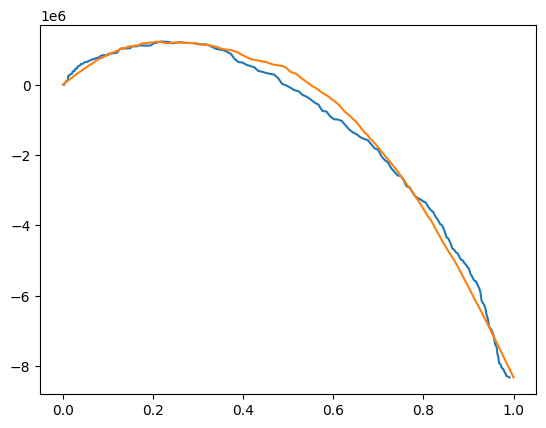

In [153]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(argcumsort['PD'], argcumsort['ProfitCum'])
plt.plot(argcumsort['AR'], argcumsort['ProfitCum'])

In [154]:
argcumsort2=argcumsort.copy()
argcumsort2=argcumsort2.sort_values(by='ProfitCum',ascending=False)
argcumsort2=argcumsort2.reset_index()
print(argcumsort2['ProfitCum'][0])
argcumsort2.head()

1226814.576976855


,index,PD,Profit,NCum,AR,ProfitCum
0,93,0.218810,1.226815e+06,2046,0.207484,1.226815e+06
1,94,0.225006,1.219010e+06,2057,0.208600,1.219010e+06
2,95,0.231324,1.216850e+06,2119,0.214887,1.216850e+06
3,99,0.257822,1.207777e+06,2544,0.257986,1.207777e+06
4,96,0.237766,1.207208e+06,2181,0.221174,1.207208e+06


In [155]:
# Scoring code

vars_sc=list(pd.unique(Scorecard[variable_name]))

vars_num=Scorecard[Scorecard[type_name]=='INT'].copy()
vars_sc_num=list(pd.unique(vars_num[variable_name]))

vars_nom=Scorecard[Scorecard[type_name]=='NOM'].copy()
vars_sc_nom=list(pd.unique(vars_nom[variable_name]))

with open('scoring_code.sas','w') as f:
    f.write('proc sql; \n')
    f.write('create table  &zbior._score as \n')
    f.write('select indataset.*  \n')
    for var in vars_sc_num:
        scv=Scorecard[Scorecard[variable_name]==var].copy()
        scv=scv.reset_index()
        f.write(', case \n')
        for i in range(scv.shape[0]):
            war=scv[condition_name][i]
            score=scv[score_name][i]
            if war.count('<')==2:
                f.write('when '+war.rsplit('<',1)[0]+' and '+war.rsplit('<=',1)[1]+' then '+str(score)+' \n')
            if war.count('<')==1 and war.count('<>')==0:
                f.write('when '+war+' then '+str(score)+' \n')
            if war.count('= '+symbol_missing)==1:
                f.write('when '+war.split(' ')[0]+' is null then '+str(score)+' \n')
            if war.count('<> '+symbol_missing)==1:
                f.write('when '+war.split(' ')[0]+' is not null then '+str(score)+' \n')
        score=scv[score_name][0]
        f.write('else '+str(score)+' end as PSC_'+var+' \n')
        f.write(' \n')
        
    for var in vars_sc_nom:
        scv=Scorecard[Scorecard[variable_name]==var].copy()
        scv=scv.reset_index()
        f.write(', case \n')
        index_other=0;
        for i in range(scv.shape[0]):
            war=scv[condition_name][i]
            score=scv[score_name][i]
            if war.count(',')==0 and war.count(symbol_other)==0:
                f.write('when '+var+' in ('+"'"+war+"'"+') then '+str(score)+' \n')
            if war.count(',')>0 and war.count(symbol_other)==0:
                f.write('when '+var+' in ('+"'"+war.split(', ')[0]+"'")
                for j in range(war.count(',')):
                    f.write(', '+"'"+war.split(', ')[j+1]+"'")
                f.write(') then '+str(score)+' \n')
            if war.count(symbol_other)==1:
                index_other=i
        score=scv[score_name][index_other]
        f.write('else '+str(score)+' end as PSC_'+var+' \n')
        f.write(' \n')
    
    f.write('/* , 1/(1+exp(-('+str(model_cal.params[0])+'*(0.0')
    for var in vars_sc:            
        f.write('+ calculated PSC_'+var)
    f.write(')+('+str(model_cal.params[1])+')))) as '+prob_event+' */ \n')
    f.write(' \n')
    
    f.write(', 0.0 \n')
    for var in vars_sc:            
        f.write('+ calculated PSC_'+var+' ')
    f.write(' as SCORECARD_POINTS \n')
    
    f.write(' \n')
    f.write('from &zbior as indataset; \n')
    f.write('quit; \n')

C:\Users\user\AppData\Local\Temp\ipykernel_260\3751675127.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f.write('/* , 1/(1+exp(-('+str(model_cal.params[0])+'*(0.0')
C:\Users\user\AppData\Local\Temp\ipykernel_260\3751675127.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f.write(')+('+str(model_cal.params[1])+')))) as '+prob_event+' */ \n')


In [22]:
# !pip install varclushi

In [23]:
# !pip install factor_analyzer

In [156]:
# Variable clustering
from varclushi import VarClusHi

In [157]:
# demo1_df.drop('quality',axis=1,inplace=True)
demo1_vc = VarClusHi(logit_train[vars_selected],maxeigval2=0.1,maxclus=None)
demo1_vc.varclus()

In [159]:
writer = pd.ExcelWriter('Variable_Clustering.xlsx', engine='xlsxwriter')

demo1_vc.info.to_excel(writer, sheet_name='Info', index_label=None, index=False)
demo1_vc.rsquare.to_excel(writer, sheet_name='Clusters', index_label=None, index=False)

# writer.save()
writer.close()

In [60]:
# !pip install shap

In [162]:
# XAI Explainable artificial intelligence

features=list(result['Efects'][variable_name].copy())
features.remove('Intercept')

# X=logit_train[features]
# y=logit_train[target_name]

X=scored_train[features]
y=scored_train[target_name]

import shap
logmodel = LogisticRegression()
logmodel.fit(X,y)

for i,v in enumerate(features):
#     logmodel.coef_[0][i]=result['Efects']['Estimation'][i]
    logmodel.coef_[0][i]=1.0
    

logmodel.intercept_=0.0

explainer=shap.LinearExplainer(logmodel,X)
shap_values=explainer(X)



In [163]:
print(logmodel.coef_,logmodel.intercept_)

[[1. 1. 1. 1. 1. 1.]] 0.0


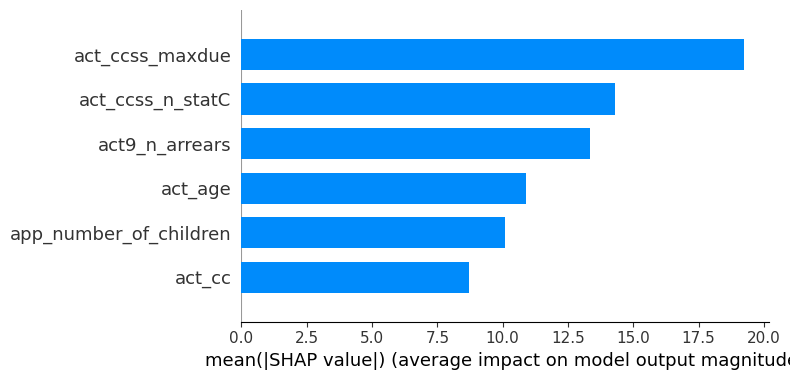

In [164]:
shap.summary_plot(shap_values,X,plot_type='bar')

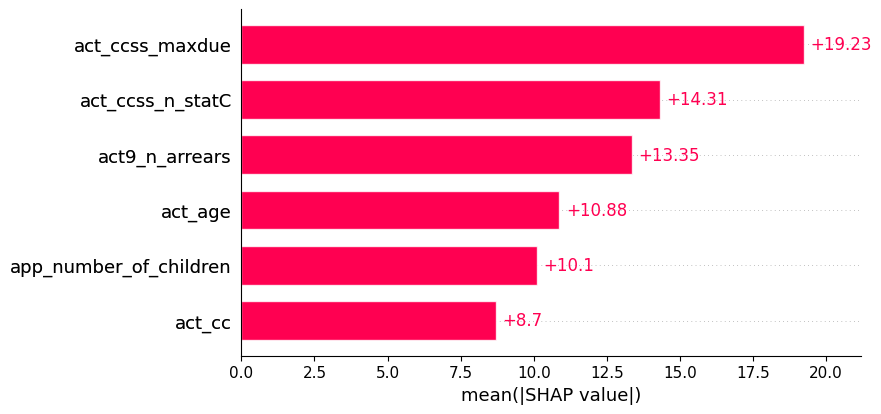

In [165]:
shap.plots.bar(shap_values)

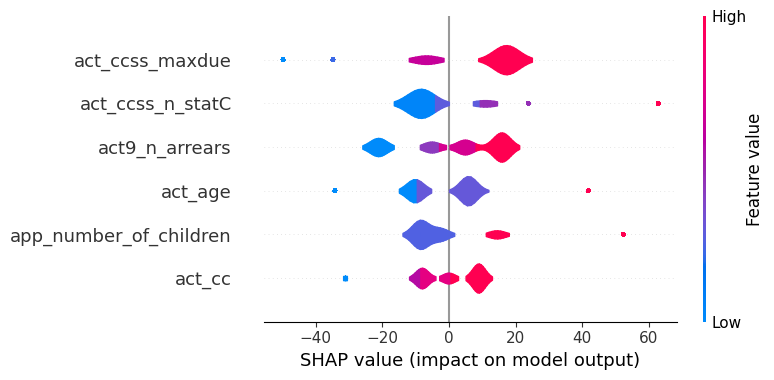

In [166]:
shap.summary_plot(shap_values,X,plot_type='violin')

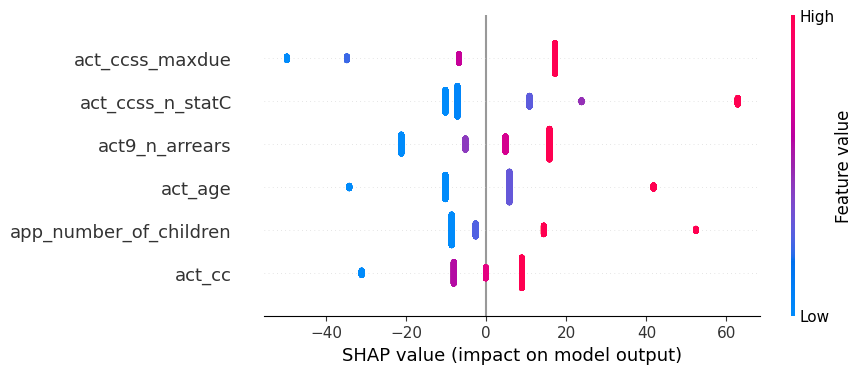

In [167]:
shap.plots.beeswarm(shap_values)

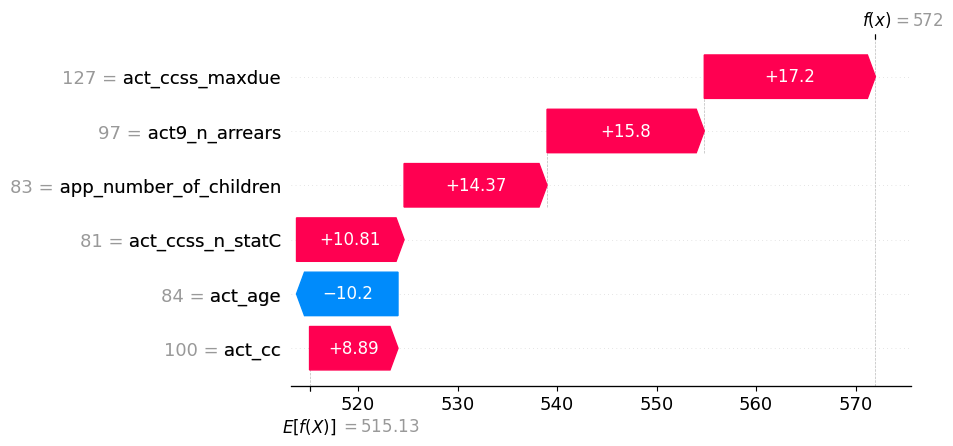

In [168]:
shap.waterfall_plot(shap_values[0])

In [169]:
shap.initjs()
shap.plots.force(shap_values[0])

In [170]:
suma=0
for v in features:
    print(v, X[v][0])
    suma=suma+X[v][0]
print('Score',suma)

act9_n_arrears 97.0
act_ccss_maxdue 127.0
act_ccss_n_statC 81.0
app_number_of_children 83.0
act_cc 100.0
act_age 84.0
Score 572.0


In [171]:
shap_values[0]

.values =
array([ 15.8 ,  17.2 ,  10.81,  14.37,   8.89, -10.2 ])

.base_values =
515.13

.data =
array([ 97., 127.,  81.,  83., 100.,  84.])

In [172]:
for v in features:
    a=X[v][0]-X[v].mean()
    print(v, a)

act9_n_arrears 14.569641649763355
act_ccss_maxdue 14.100912778904672
act_ccss_n_statC 8.824543610547664
app_number_of_children 15.1473968897904
act_cc 9.603786342123058
act_age -9.960784313725483


In [173]:
XS=X.copy()
XS['sum']=0.0
for v in features:
   XS['sum']=XS['sum']+X[v]

XS['sum'].mean()

519.7145030425963

In [174]:
XShap=pd.DataFrame(shap_values.values)
XShap['sum']=0.0
for i,v in enumerate(features):
    XShap['sum']=XShap['sum']+XShap[i]
    
XShap['sum'].mean()

4.584503042596354

In [74]:
a=shap_values.base_values.mean()+XShap['sum'].mean()
a

519.7145030425961